In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def disable_scroll():
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
    
disable_scroll()

<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [3]:
#load image files and plot histograms
ct_ims = open('ct_images.list').readlines()
ct_ims = [c.replace('\n','') for c in ct_ims]
mr_ims = open('mr_images.list').readlines()
mr_ims = [c.replace('\n','') for c in mr_ims]
ims = open('./data/images.txt').readlines()
ims = [c.replace('\n','') for c in ims]
truths = open('./data/truths.txt').readlines()
truths = [c.replace('\n','') for c in truths]
print ct_ims
print truths

['OSMSC0001', 'OSMSC0002', 'OSMSC0003', 'OSMSC0004', 'OSMSC0005', 'OSMSC0065', 'OSMSC0065', 'OSMSC0065', 'OSMSC0065', 'OSMSC0065', 'OSMSC0091', 'OSMSC0091', 'OSMSC0092', 'OSMSC0108', 'OSMSC0109', 'OSMSC0113', 'OSMSC0115', 'OSMSC0116', 'OSMSC0117', 'OSMSC0118', 'OSMSC0119', 'OSMSC0138', 'OSMSC0139', 'OSMSC0140', 'OSMSC0141', 'OSMSC0142', 'OSMSC0143', 'OSMSC0144', 'OSMSC0145', 'OSMSC0146', 'OSMSC0147', 'OSMSC0148', 'OSMSC0149', 'OSMSC0150', 'OSMSC0151', 'OSMSC0156', 'OSMSC0157', 'OSMSC0158', 'OSMSC0159', 'OSMSC0168', 'OSMSC0172', 'OSMSC0173', 'OSMSC0174', 'OSMSC0175', 'OSMSC0176', 'OSMSC0177', 'OSMSC0179', 'OSMSC0180', 'OSMSC0184', 'OSMSC0185', 'OSMSC0186', 'OSMSC0187', 'OSMSC0188', 'cabg5', 'cabg10', 'cabg11']
['/home/marsdenlab/datasets/vascular_data/OSMSC0001/0001_0001/0001_0001-cm.mha', '/home/marsdenlab/datasets/vascular_data/OSMSC0002/0002_0001/0002_0001-cm.mha', '/home/marsdenlab/datasets/vascular_data/OSMSC0003/0003_0001/0003_0001-cm.mha', '/home/marsdenlab/datasets/vascular_data

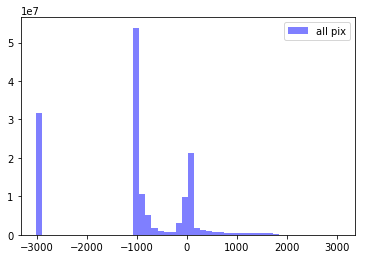

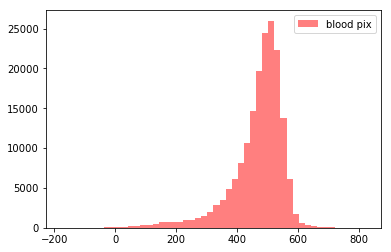

In [4]:
i=0
def get_pix(imgf,truthf):
    img = sitk.ReadImage(imgf)
    truth = sitk.ReadImage(truthf)

    imgnp = sitk.GetArrayFromImage(img)
    truthnp = sitk.GetArrayFromImage(truth)

    pix = np.ravel(imgnp)
    blood = np.ravel(imgnp[truthnp>0])

    return pix,blood

pix,blood = get_pix(ims[i],truths[i])
plt.figure()
plt.hist(pix,bins=50,alpha=0.5,color='b',label='all pix')
plt.legend()
plt.show()

plt.figure()
plt.hist(blood,bins=50,alpha=0.5,color='r',label='blood pix')
plt.legend()
plt.show()


In [10]:
np.mean(imgnp[truthnp>0])

467.16930129090969

In [22]:
p_mr = []
b_mr = []
p_ct = []
b_ct = []

for i in range(len(ims)/2):
    pix,blood = get_pix(ims[i],truths[i])
    
    if any([s in ims[i] for s in ct_ims]):
        print 'ct'
        p_ct = np.concatenate((p_ct,pix),axis=0)
        b_ct = np.concatenate((b_ct,blood),axis=0)
        
    else:
        print 'mr'
        
        p_mr = np.concatenate((p_mr,pix),axis=0)
        b_mr = np.concatenate((b_mr,blood),axis=0)
        
p_mr = np.ravel(p_mr)
b_mr = np.ravel(b_mr)
p_ct = np.ravel(p_ct)
b_ct = np.ravel(b_ct)

print "mr pix mean = {}, mr blood mean = {}, ct pix mean = {}, ct blood mean = {}".format(
    np.mean(p_mr),np.mean(b_mr),np.mean(p_ct),np.mean(b_ct))

ct
ct
ct
ct
ct
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
ct
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
mr
ct
ct
mr
ct
ct
ct
ct
ct
ct
mr
mr
mr
mr
mr
mr
mr
mr
mr
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
ct
mr
mr
mr
mr
mr
mr
ct
mr
mr
mr
ct
ct
ct
ct
ct
ct
mr
ct
ct
mr
mr
mr
ct
ct
ct
ct
ct
mr
ct
ct


KeyboardInterrupt: 

(1709318144,)
(7482766,)


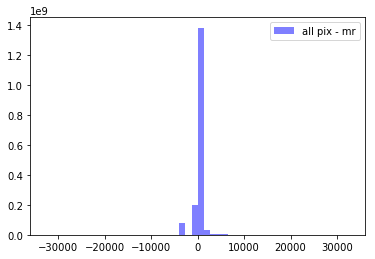

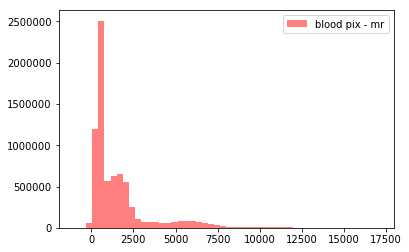

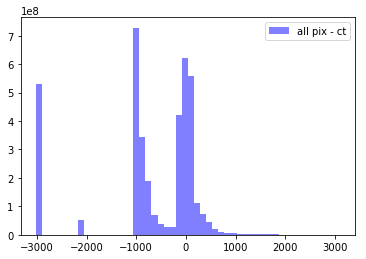

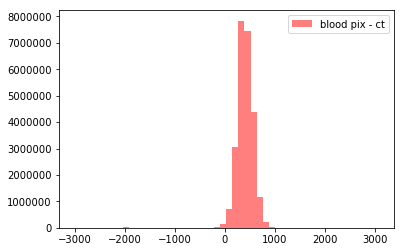

In [24]:
print np.ravel(p_mr[:]).shape
print b_mr.shape
plt.figure()
plt.hist(p_mr,bins=50,alpha=0.5,color='b',label='all pix - mr')
plt.legend()
plt.show()

plt.figure()
plt.hist(b_mr,bins=50,alpha=0.5,color='r',label='blood pix - mr')
plt.legend()
plt.show()

plt.figure()
plt.hist(p_ct,bins=50,alpha=0.5,color='b',label='all pix - ct')
plt.legend()
plt.show()

plt.figure()
plt.hist(b_ct,bins=50,alpha=0.5,color='r',label='blood pix - ct')
plt.legend()
plt.show()


/home/marsdenlab/datasets/vascular_data/OSMSC0001/OSMSC0001-cm.mha
ct


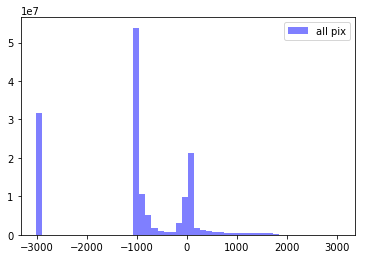

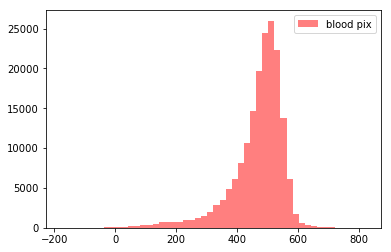

/home/marsdenlab/datasets/vascular_data/OSMSC0002/OSMSC0002-cm.mha
ct


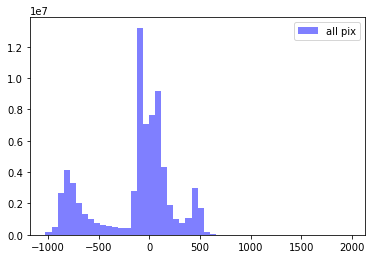

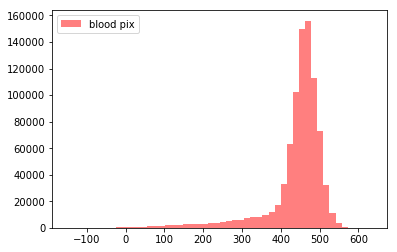

/home/marsdenlab/datasets/vascular_data/OSMSC0003/OSMSC0003-cm.mha
ct


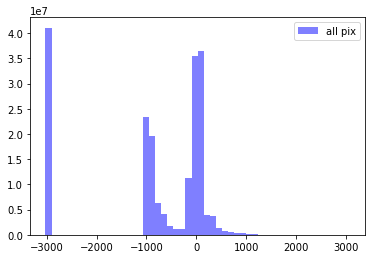

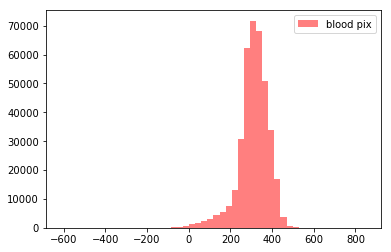

/home/marsdenlab/datasets/vascular_data/OSMSC0004/OSMSC0004-cm.mha
ct


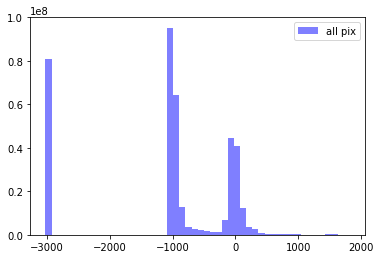

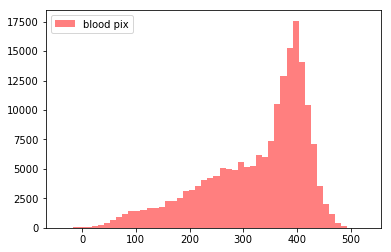

/home/marsdenlab/datasets/vascular_data/OSMSC0005/OSMSC0005-cm.mha
ct


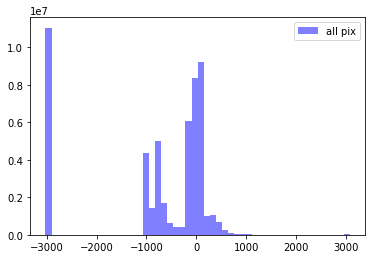

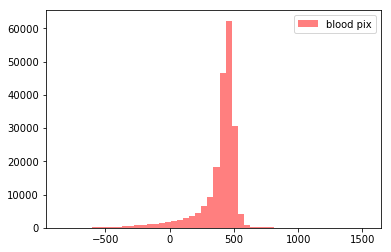

/home/marsdenlab/datasets/vascular_data/OSMSC0006/OSMSC0006-cm.mha
mr


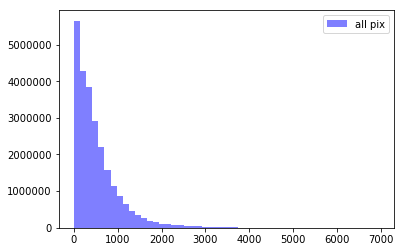

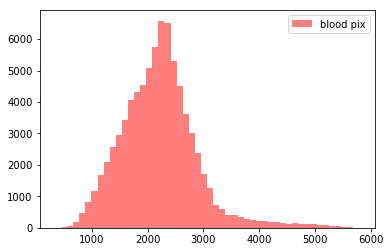

/home/marsdenlab/datasets/vascular_data/OSMSC0066/OSMSC0066-cm.mha
mr


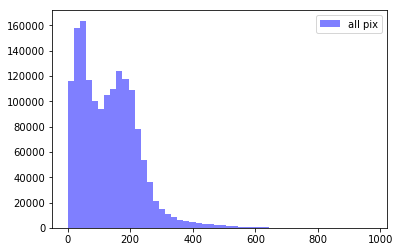

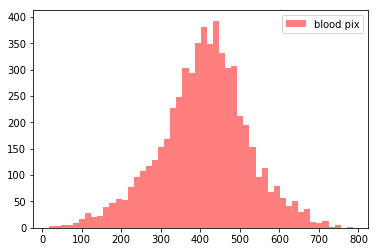

/home/marsdenlab/datasets/vascular_data/OSMSC0068/OSMSC0068-cm.mha
mr


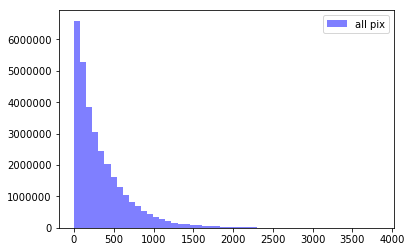

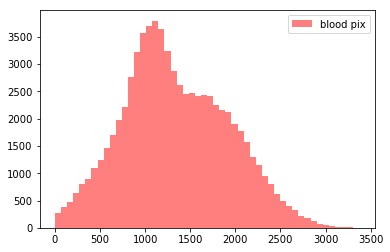

/home/marsdenlab/datasets/vascular_data/OSMSC0069/OSMSC0069-cm.mha
mr


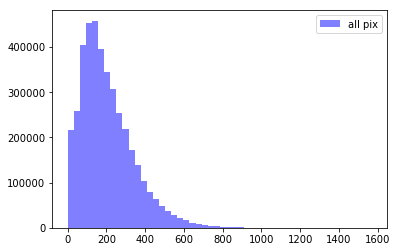

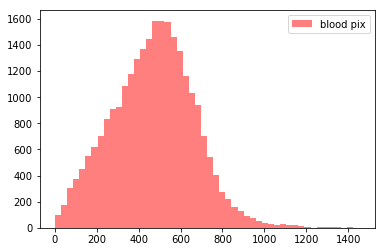

/home/marsdenlab/datasets/vascular_data/OSMSC0071/OSMSC0071-cm.mha
mr


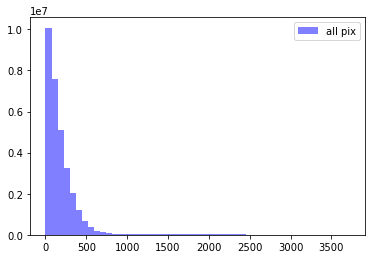

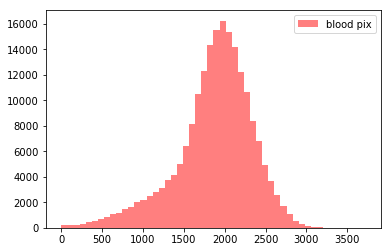

/home/marsdenlab/datasets/vascular_data/OSMSC0072/OSMSC0072-cm.mha
mr


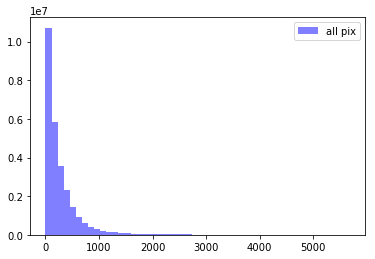

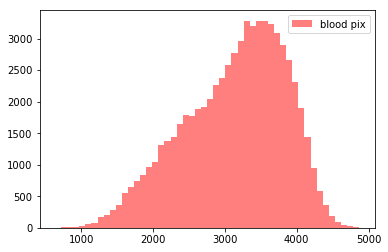

/home/marsdenlab/datasets/vascular_data/OSMSC0073/OSMSC0073-cm.mha
mr


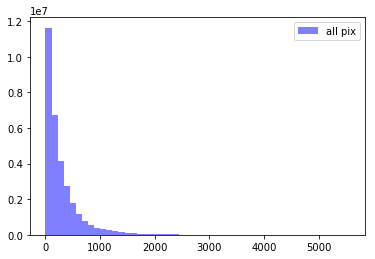

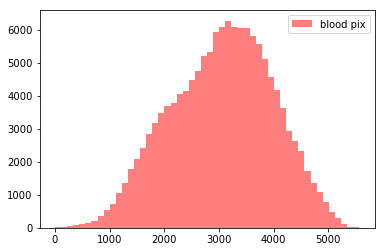

/home/marsdenlab/datasets/vascular_data/OSMSC0074/OSMSC0074-cm.mha
mr


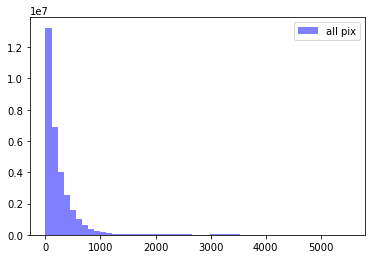

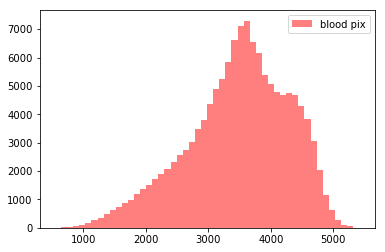

/home/marsdenlab/datasets/vascular_data/OSMSC0078/OSMSC0078-cm.mha
mr


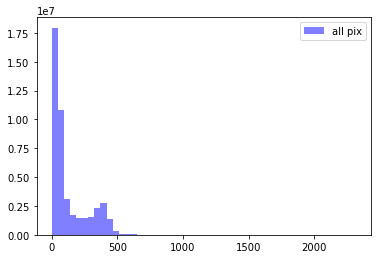

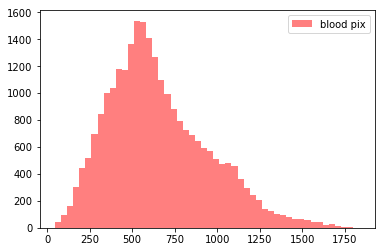

/home/marsdenlab/datasets/vascular_data/OSMSC0079/OSMSC0079-cm.mha
mr


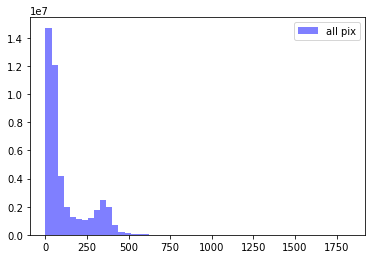

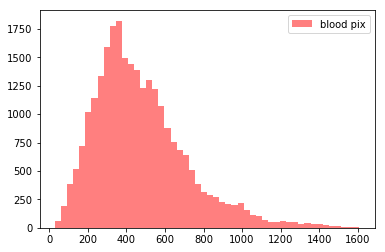

/home/marsdenlab/datasets/vascular_data/OSMSC0083/OSMSC0083-cm.mha
mr


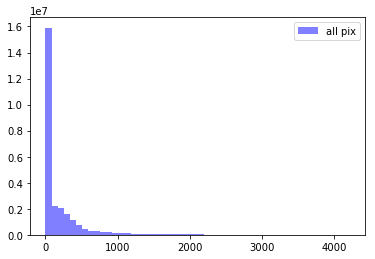

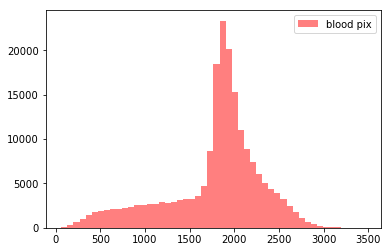

/home/marsdenlab/datasets/vascular_data/OSMSC0085/OSMSC0085-cm.mha
mr


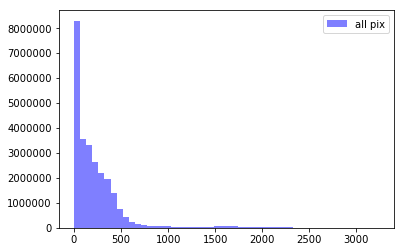

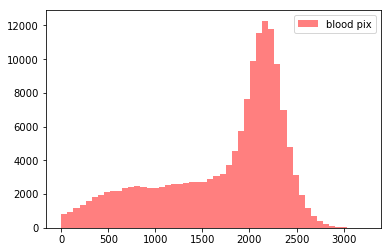

/home/marsdenlab/datasets/vascular_data/OSMSC0087/OSMSC0087-cm.mha
mr


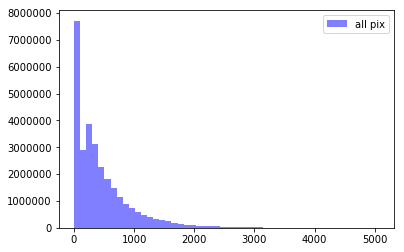

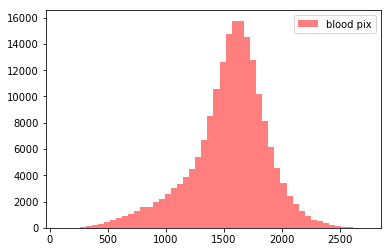

/home/marsdenlab/datasets/vascular_data/OSMSC0090/OSMSC0090-cm.mha
mr


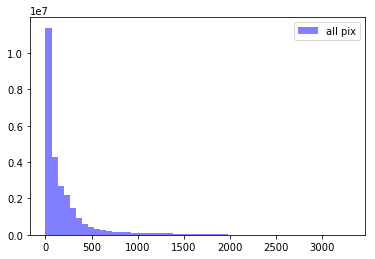

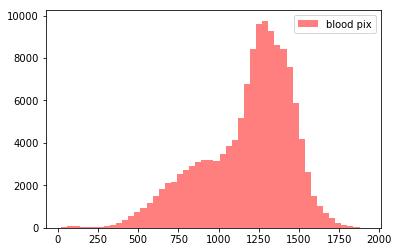

/home/marsdenlab/datasets/vascular_data/OSMSC0092/OSMSC0092-cm.mha
ct


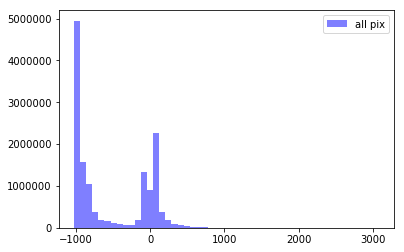

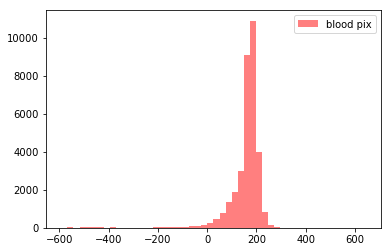

/home/marsdenlab/datasets/vascular_data/OSMSC0093/OSMSC0093-cm.mha
mr


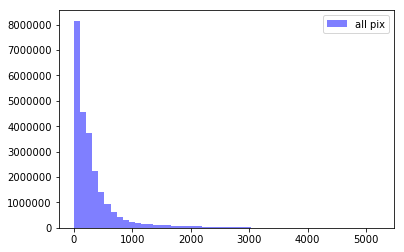

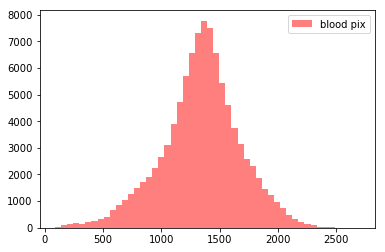

/home/marsdenlab/datasets/vascular_data/OSMSC0094/OSMSC0094-cm.mha
mr


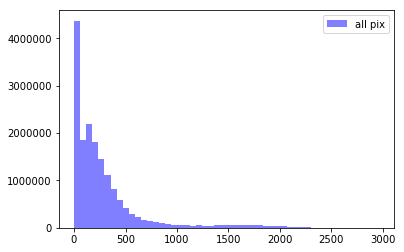

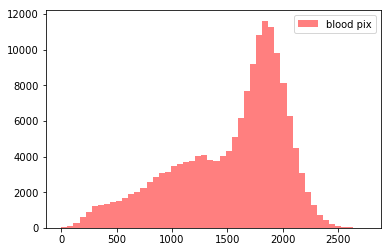

/home/marsdenlab/datasets/vascular_data/OSMSC0095/OSMSC0095-cm.mha
mr


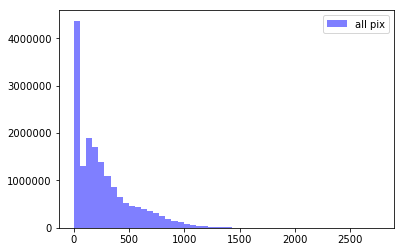

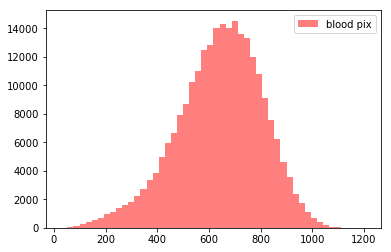

/home/marsdenlab/datasets/vascular_data/OSMSC0096/OSMSC0096-cm.mha
mr


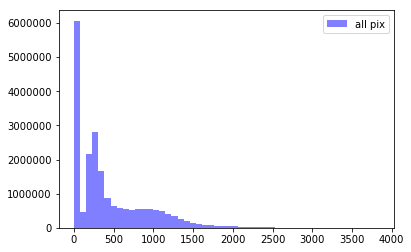

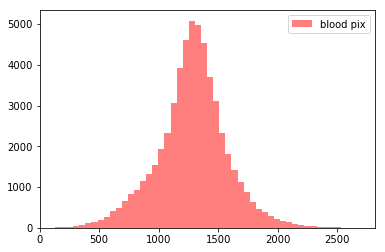

/home/marsdenlab/datasets/vascular_data/OSMSC0097/OSMSC0097-cm.mha
mr


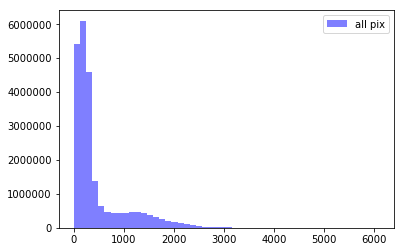

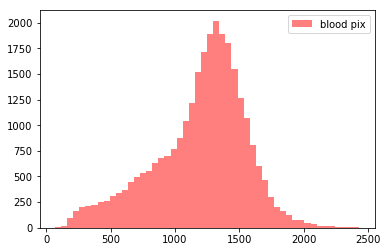

/home/marsdenlab/datasets/vascular_data/OSMSC0098/OSMSC0098-cm.mha
mr


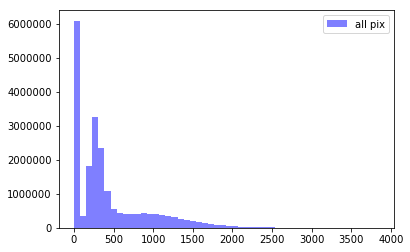

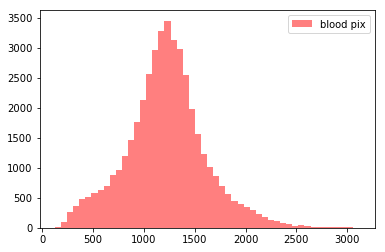

/home/marsdenlab/datasets/vascular_data/OSMSC0099/OSMSC0099-cm.mha
mr


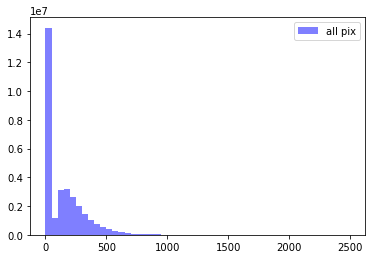

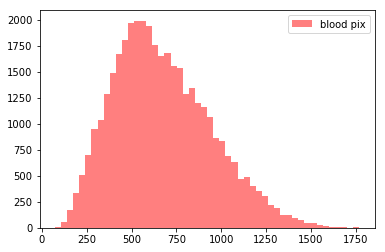

/home/marsdenlab/datasets/vascular_data/OSMSC0100/OSMSC0100-cm.mha
mr


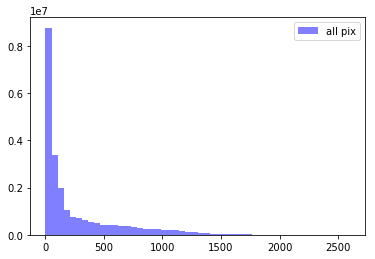

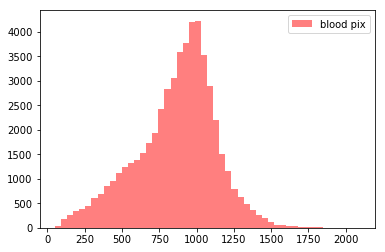

/home/marsdenlab/datasets/vascular_data/OSMSC0101/OSMSC0101-cm.mha
mr


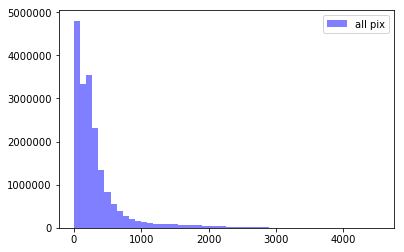

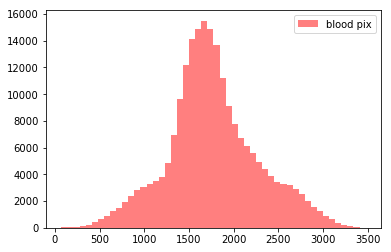

/home/marsdenlab/datasets/vascular_data/OSMSC0103/OSMSC0103-cm.mha
mr


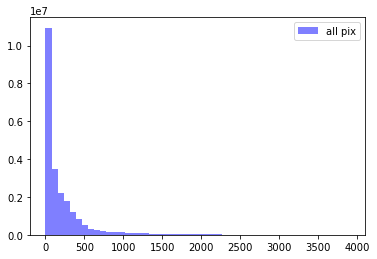

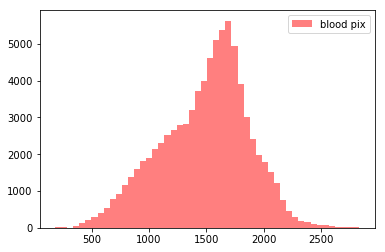

/home/marsdenlab/datasets/vascular_data/OSMSC0104/OSMSC0104-cm.mha
mr


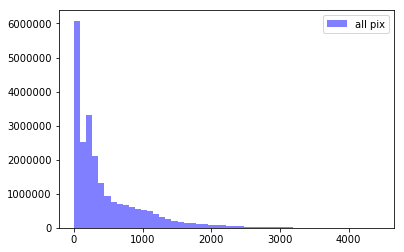

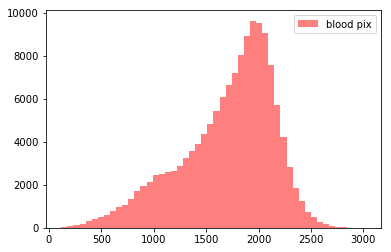

/home/marsdenlab/datasets/vascular_data/OSMSC0105/OSMSC0105-cm.mha
mr


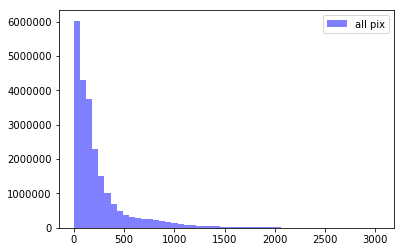

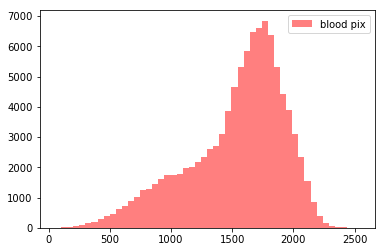

/home/marsdenlab/datasets/vascular_data/OSMSC0106/OSMSC0106-cm.mha
mr


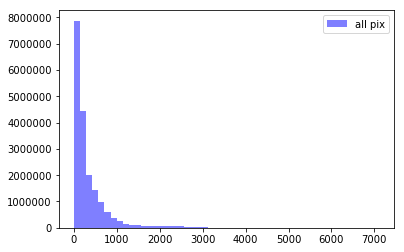

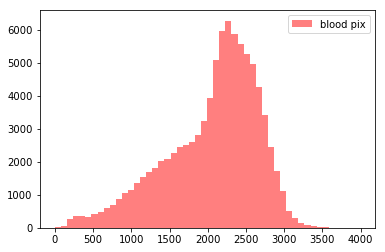

/home/marsdenlab/datasets/vascular_data/OSMSC0108/OSMSC0108-cm.mha
ct


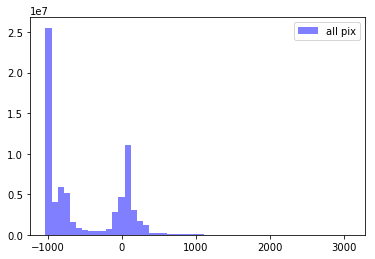

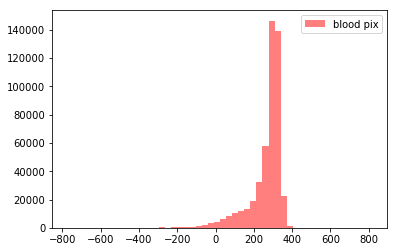

/home/marsdenlab/datasets/vascular_data/OSMSC0109/OSMSC0109-cm.mha
ct


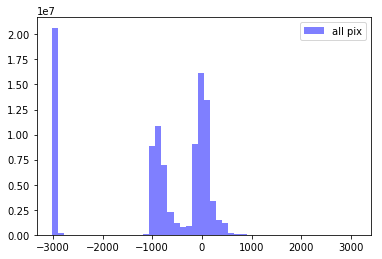

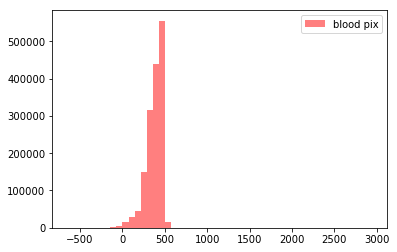

/home/marsdenlab/datasets/vascular_data/OSMSC0110/OSMSC0110-cm.mha
mr


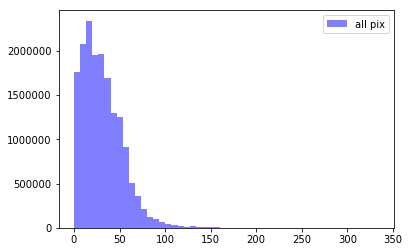

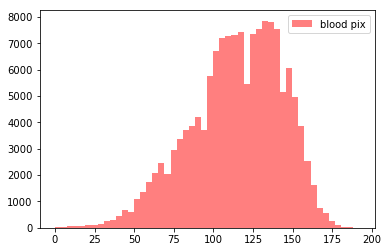

/home/marsdenlab/datasets/vascular_data/OSMSC0113/OSMSC0113-cm.mha
ct


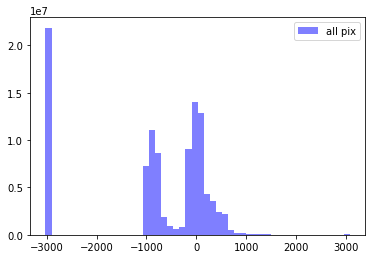

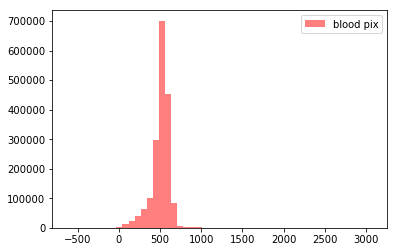

/home/marsdenlab/datasets/vascular_data/OSMSC0115/OSMSC0115-cm.mha
ct


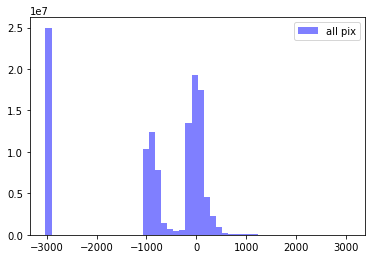

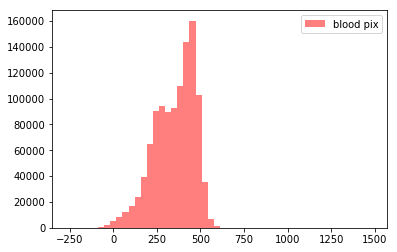

/home/marsdenlab/datasets/vascular_data/OSMSC0116/OSMSC0116-cm.mha
ct


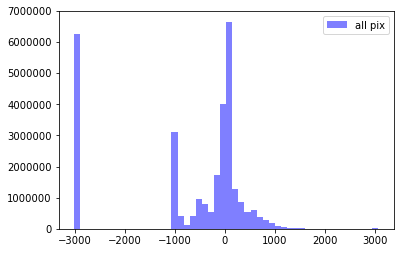

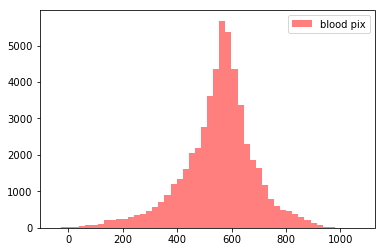

/home/marsdenlab/datasets/vascular_data/OSMSC0117/OSMSC0117-cm.mha
ct


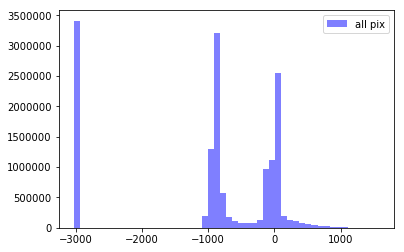

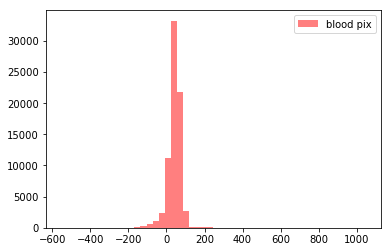

/home/marsdenlab/datasets/vascular_data/OSMSC0118/OSMSC0118-cm.mha
ct


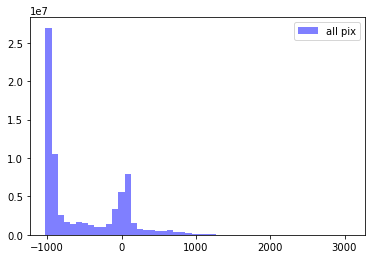

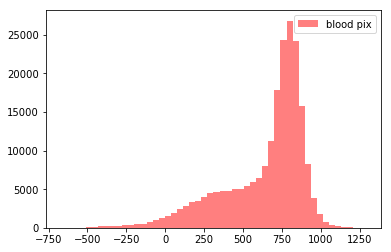

/home/marsdenlab/datasets/vascular_data/OSMSC0119/OSMSC0119-cm.mha
ct


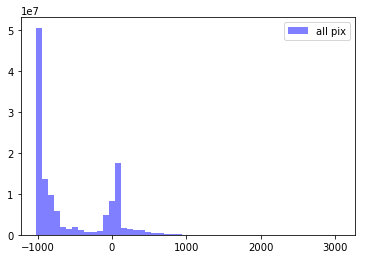

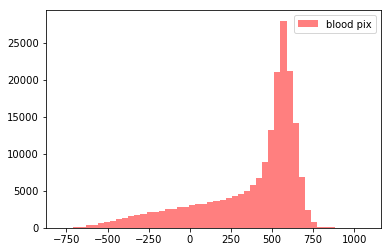

/home/marsdenlab/datasets/vascular_data/OSMSC0121/OSMSC0121-cm.mha
mr


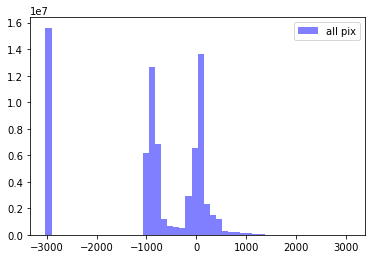

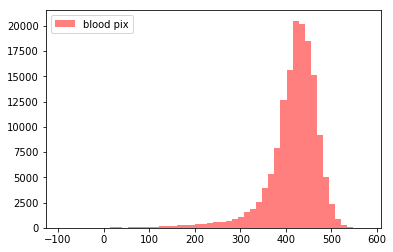

/home/marsdenlab/datasets/vascular_data/OSMSC0125/OSMSC0125-cm.mha
mr


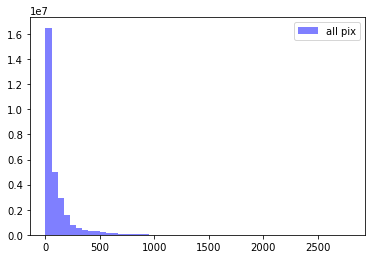

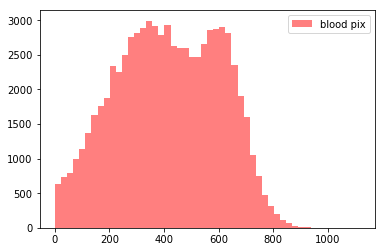

/home/marsdenlab/datasets/vascular_data/OSMSC0126/OSMSC0126-cm.mha
mr


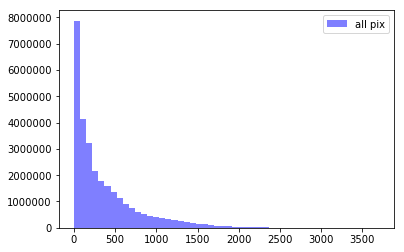

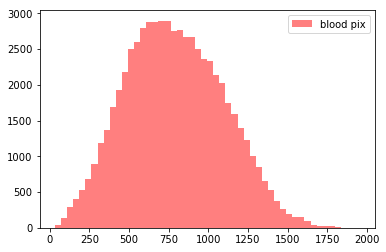

/home/marsdenlab/datasets/vascular_data/OSMSC0129/OSMSC0129-cm.mha
mr


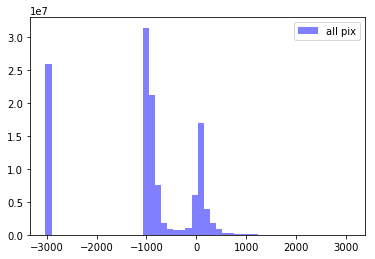

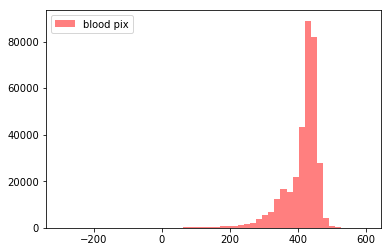

/home/marsdenlab/datasets/vascular_data/OSMSC0130/OSMSC0130-cm.mha
mr


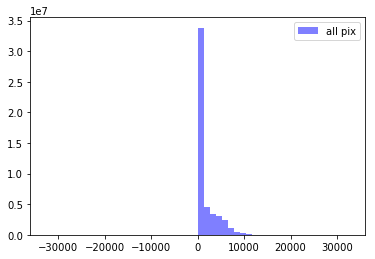

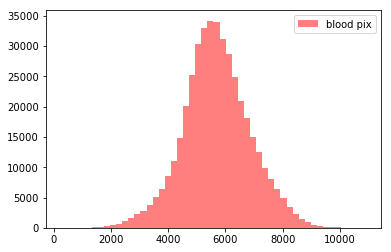

/home/marsdenlab/datasets/vascular_data/OSMSC0131/OSMSC0131-cm.mha
mr


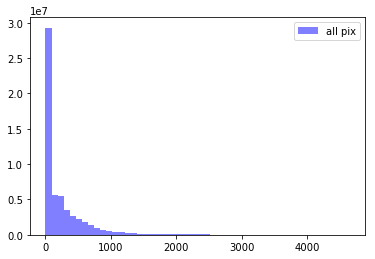

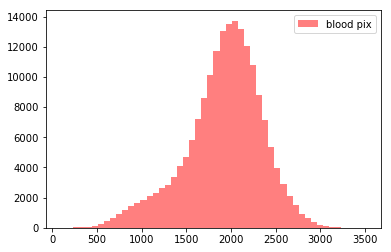

/home/marsdenlab/datasets/vascular_data/OSMSC0134/OSMSC0134-cm.mha
mr


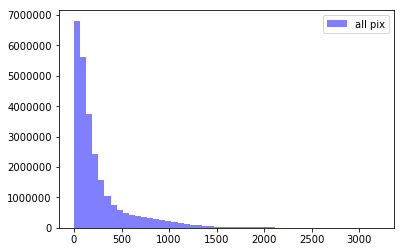

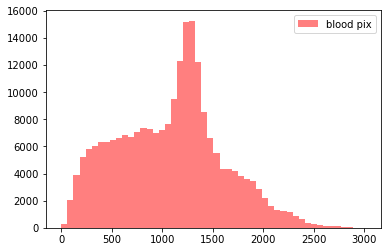

/home/marsdenlab/datasets/vascular_data/OSMSC0135/OSMSC0135-cm.mha
mr


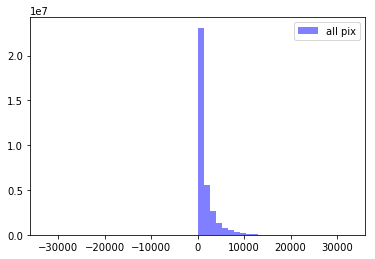

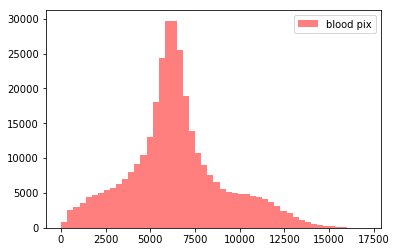

/home/marsdenlab/datasets/vascular_data/OSMSC0136/OSMSC0136-cm.mha
mr


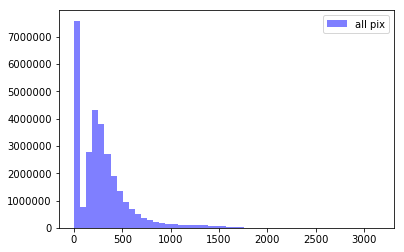

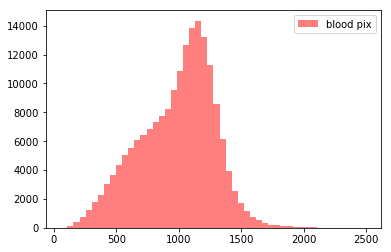

/home/marsdenlab/datasets/vascular_data/OSMSC0138/OSMSC0138-cm.mha
ct


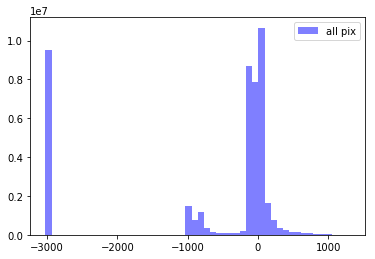

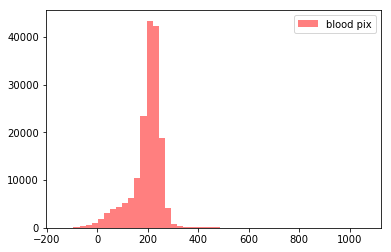

/home/marsdenlab/datasets/vascular_data/OSMSC0139/OSMSC0139-cm.mha
ct


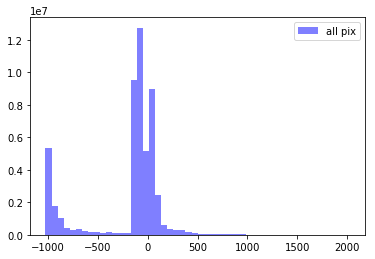

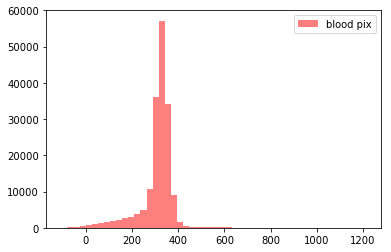

/home/marsdenlab/datasets/vascular_data/OSMSC0140/OSMSC0140-cm.mha
ct


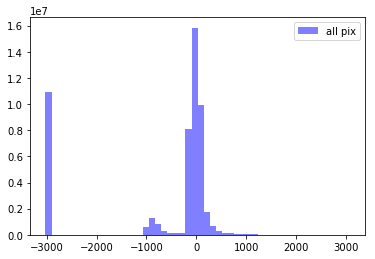

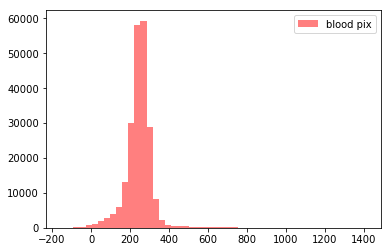

/home/marsdenlab/datasets/vascular_data/OSMSC0141/OSMSC0141-cm.mha
ct


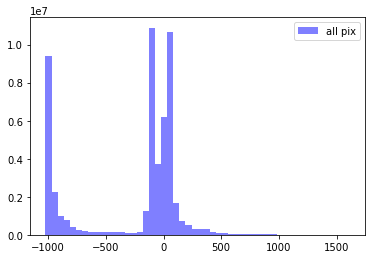

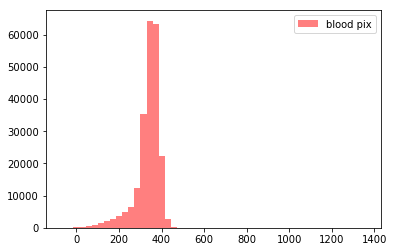

/home/marsdenlab/datasets/vascular_data/OSMSC0142/OSMSC0142-cm.mha
ct


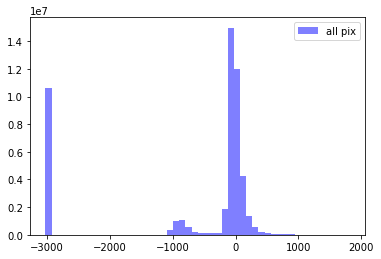

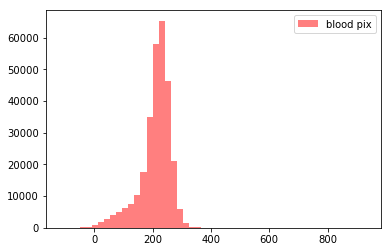

/home/marsdenlab/datasets/vascular_data/OSMSC0143/OSMSC0143-cm.mha
ct


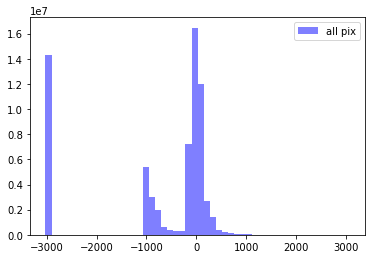

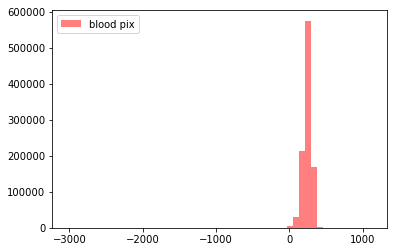

/home/marsdenlab/datasets/vascular_data/OSMSC0144/OSMSC0144-cm.mha
ct


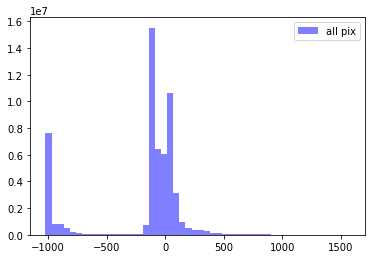

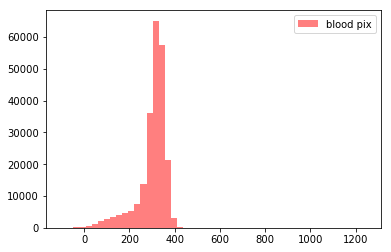

/home/marsdenlab/datasets/vascular_data/OSMSC0145/OSMSC0145-cm.mha
ct


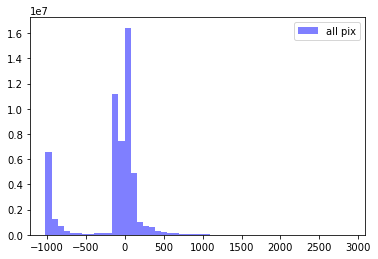

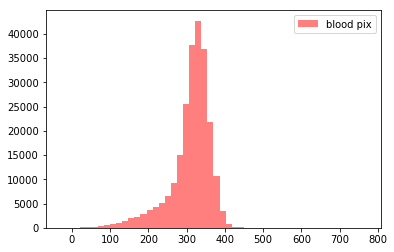

/home/marsdenlab/datasets/vascular_data/OSMSC0146/OSMSC0146-cm.mha
ct


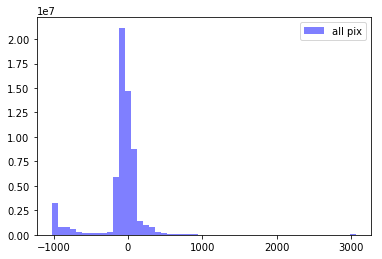

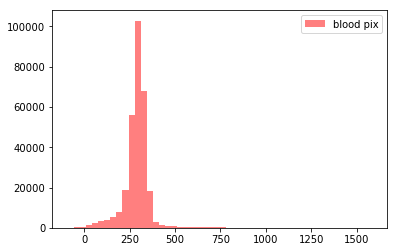

/home/marsdenlab/datasets/vascular_data/OSMSC0147/OSMSC0147-cm.mha
ct


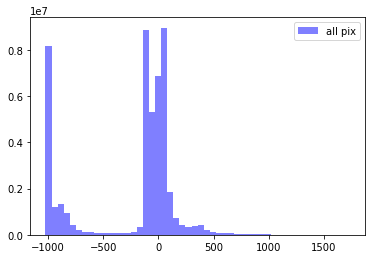

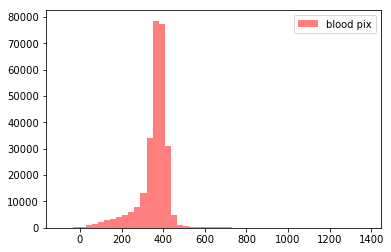

/home/marsdenlab/datasets/vascular_data/OSMSC0148/OSMSC0148-cm.mha
ct


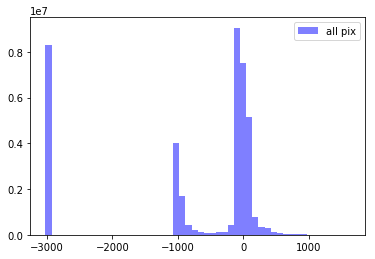

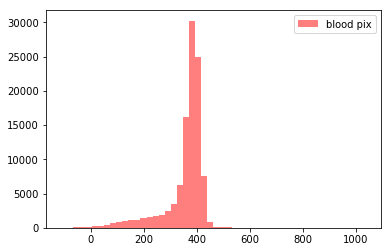

/home/marsdenlab/datasets/vascular_data/OSMSC0149/OSMSC0149-cm.mha
ct


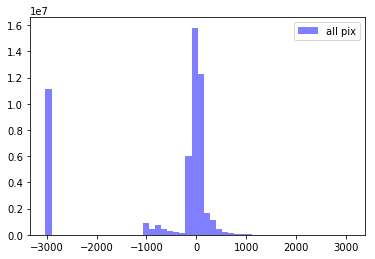

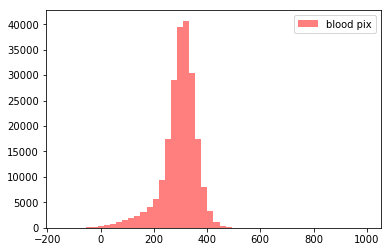

/home/marsdenlab/datasets/vascular_data/OSMSC0150/OSMSC0150-cm.mha
ct


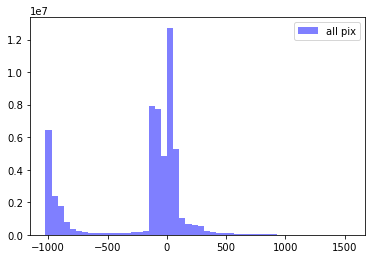

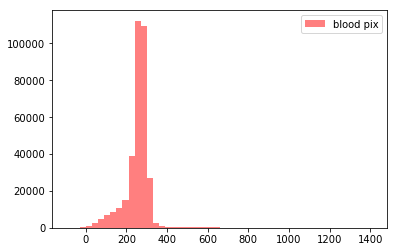

/home/marsdenlab/datasets/vascular_data/OSMSC0151/OSMSC0151-cm.mha
ct


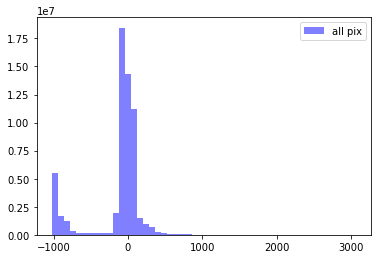

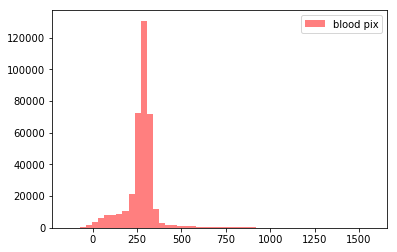

/home/marsdenlab/datasets/vascular_data/OSMSC0156/OSMSC0156-cm.mha
ct


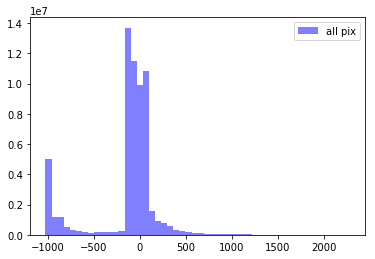

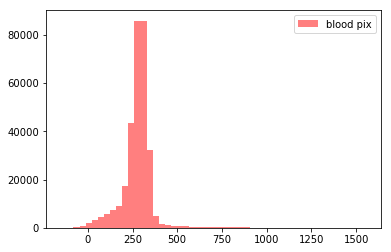

/home/marsdenlab/datasets/vascular_data/OSMSC0157/OSMSC0157-cm.mha
ct


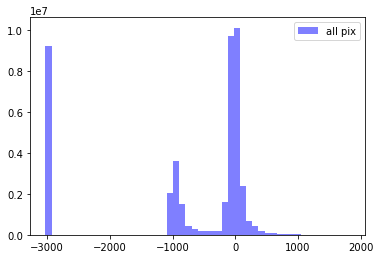

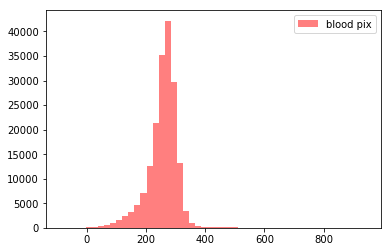

/home/marsdenlab/datasets/vascular_data/OSMSC0158/OSMSC0158-cm.mha
ct


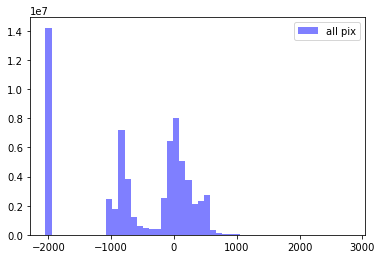

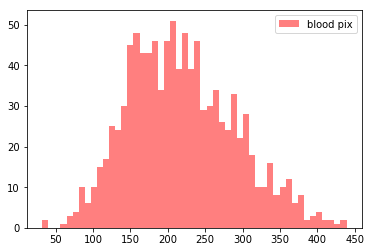

/home/marsdenlab/datasets/vascular_data/OSMSC0159/OSMSC0159-cm.mha
ct


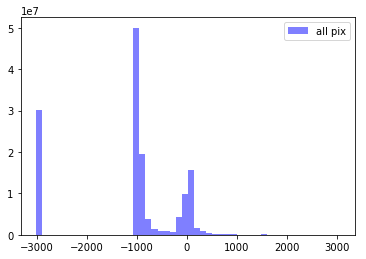

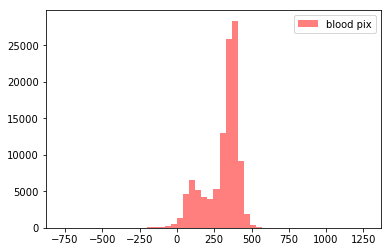

/home/marsdenlab/datasets/vascular_data/OSMSC0160/OSMSC0160-cm.mha
mr


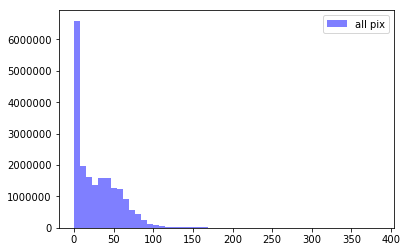

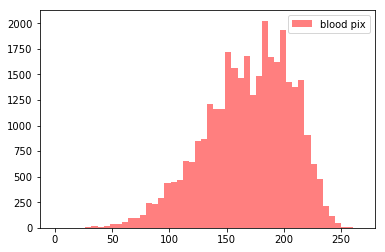

/home/marsdenlab/datasets/vascular_data/OSMSC0161/OSMSC0161-cm.mha
mr


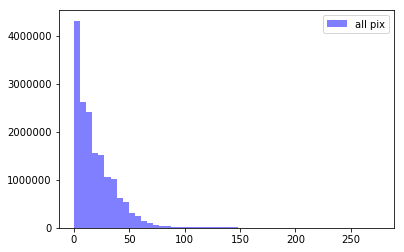

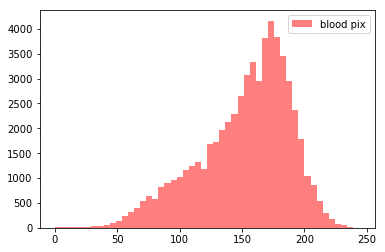

/home/marsdenlab/datasets/vascular_data/OSMSC0162/OSMSC0162-cm.mha
mr


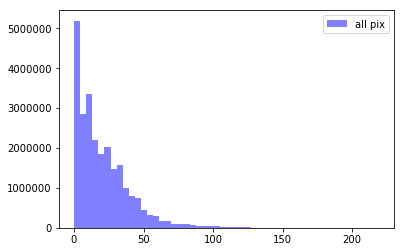

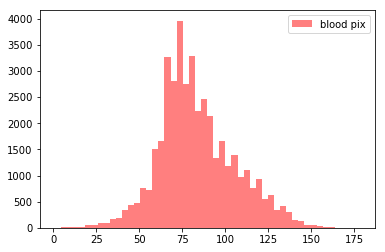

/home/marsdenlab/datasets/vascular_data/OSMSC0163/OSMSC0163-cm.mha
mr


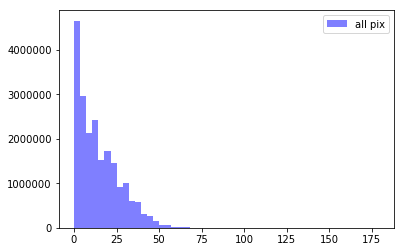

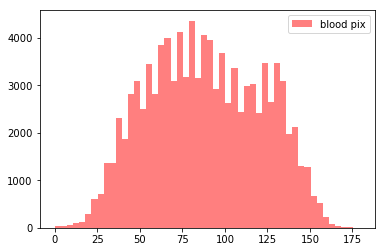

/home/marsdenlab/datasets/vascular_data/OSMSC0166/OSMSC0166-cm.mha
mr


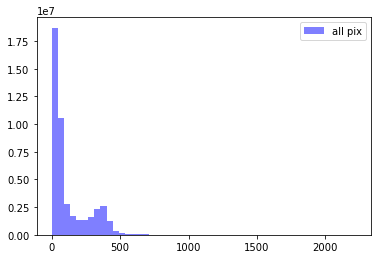

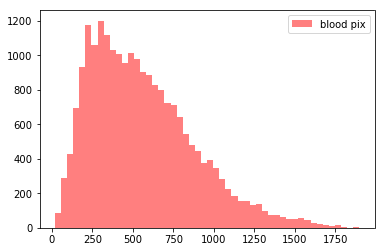

/home/marsdenlab/datasets/vascular_data/OSMSC0167/OSMSC0167-cm.mha
mr


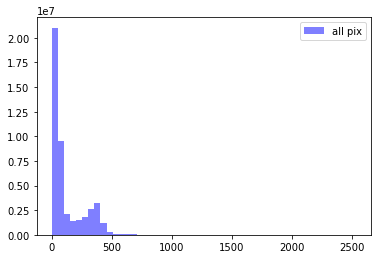

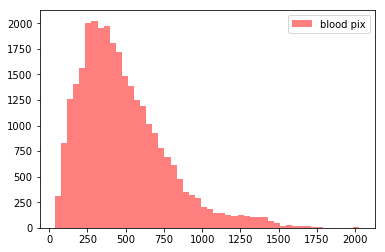

/home/marsdenlab/datasets/vascular_data/OSMSC0168/OSMSC0168-cm.mha
ct


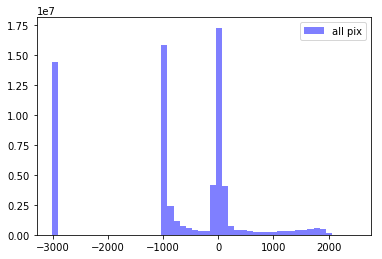

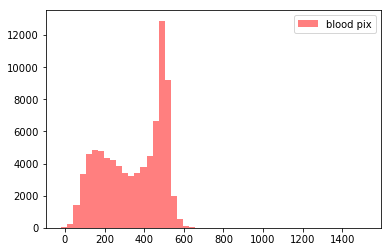

/home/marsdenlab/datasets/vascular_data/OSMSC0169/OSMSC0169-cm.mha
mr


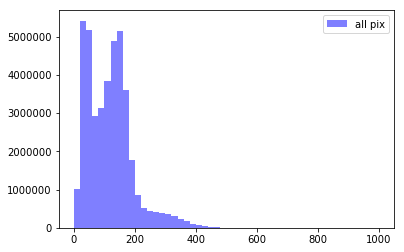

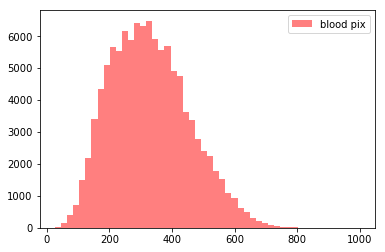

/home/marsdenlab/datasets/vascular_data/OSMSC0170/OSMSC0170-cm.mha
mr


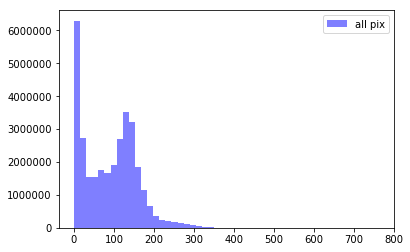

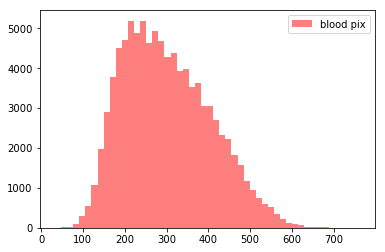

/home/marsdenlab/datasets/vascular_data/OSMSC0171/OSMSC0171-cm.mha
mr


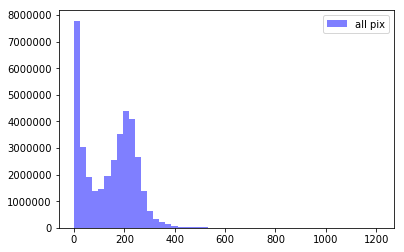

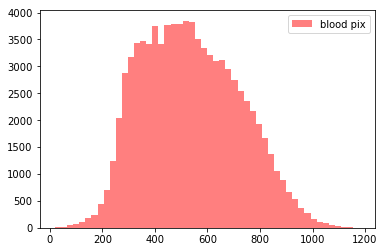

/home/marsdenlab/datasets/vascular_data/OSMSC0172/OSMSC0172-cm.mha
ct


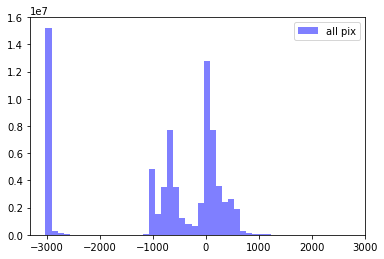

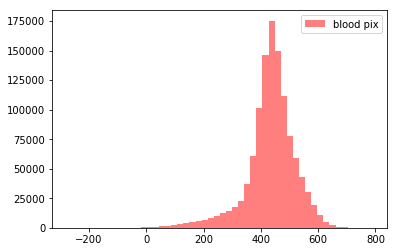

/home/marsdenlab/datasets/vascular_data/OSMSC0173/OSMSC0173-cm.mha
ct


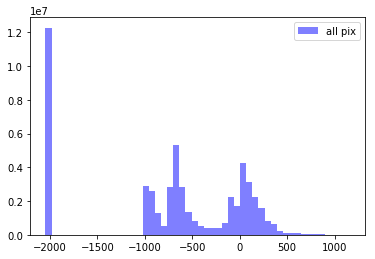

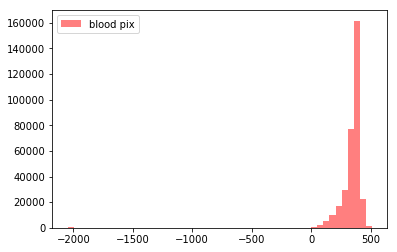

/home/marsdenlab/datasets/vascular_data/OSMSC0174/OSMSC0174-cm.mha
ct


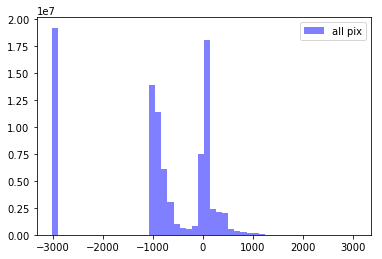

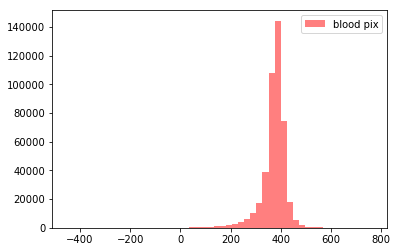

/home/marsdenlab/datasets/vascular_data/OSMSC0175/OSMSC0175-cm.mha
ct


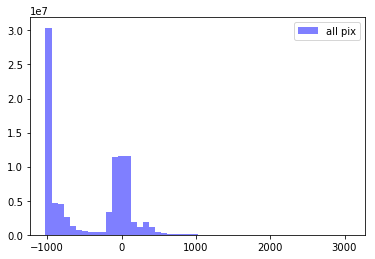

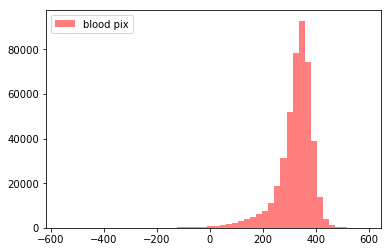

/home/marsdenlab/datasets/vascular_data/OSMSC0176/OSMSC0176-cm.mha
ct


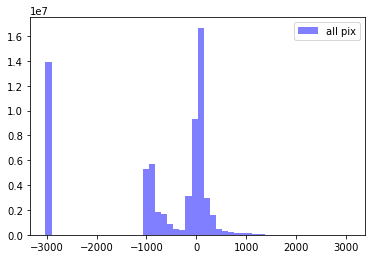

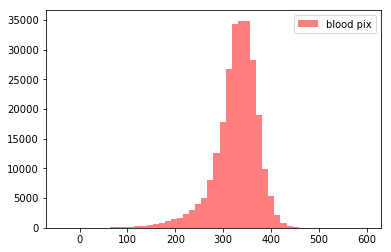

/home/marsdenlab/datasets/vascular_data/OSMSC0177/OSMSC0177-cm.mha
ct


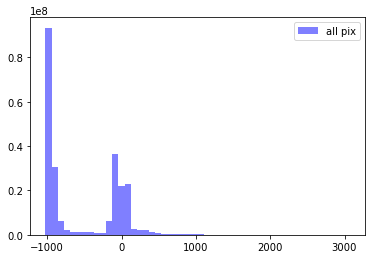

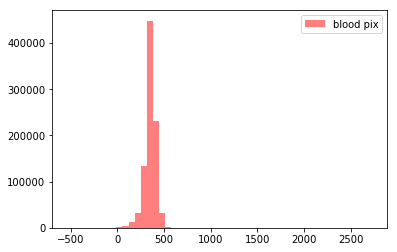

/home/marsdenlab/datasets/vascular_data/OSMSC0178/OSMSC0178-cm.mha
mr


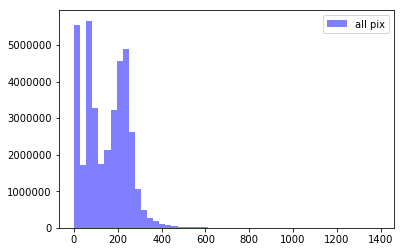

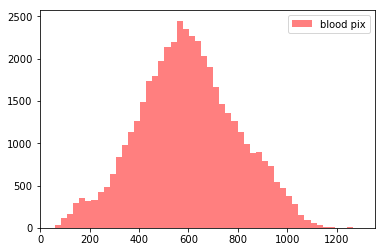

/home/marsdenlab/datasets/vascular_data/OSMSC0179/OSMSC0179-cm.mha
ct


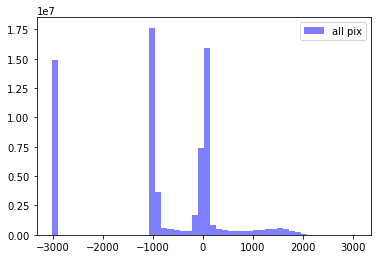

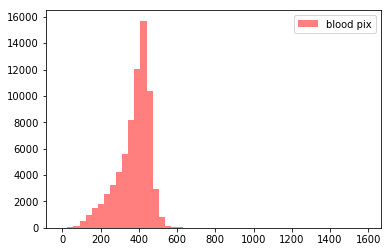

/home/marsdenlab/datasets/vascular_data/OSMSC0180/OSMSC0180-cm.mha
ct


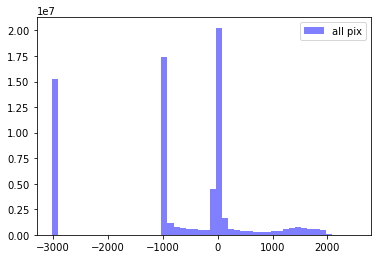

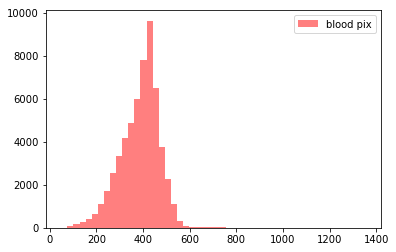

/home/marsdenlab/datasets/vascular_data/OSMSC0181/OSMSC0181-cm.mha
mr


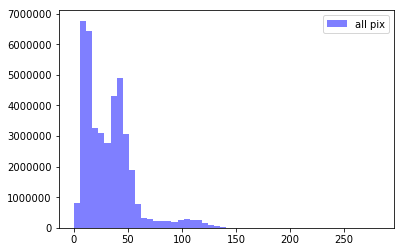

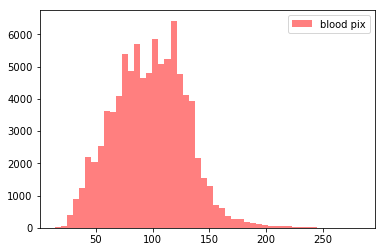

/home/marsdenlab/datasets/vascular_data/OSMSC0182/OSMSC0182-cm.mha
mr


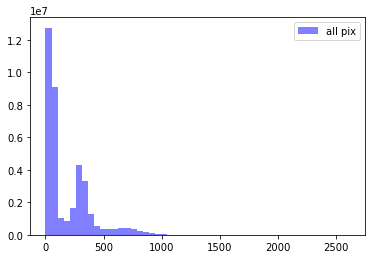

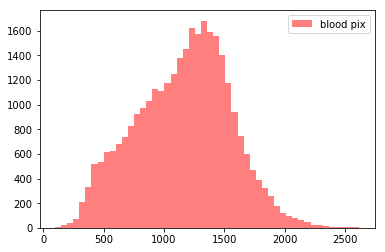

/home/marsdenlab/datasets/vascular_data/OSMSC0183/OSMSC0183-cm.mha
mr


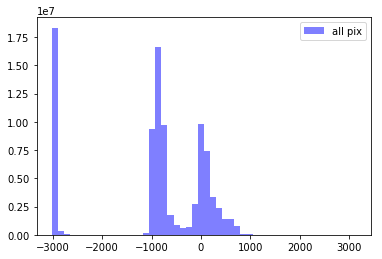

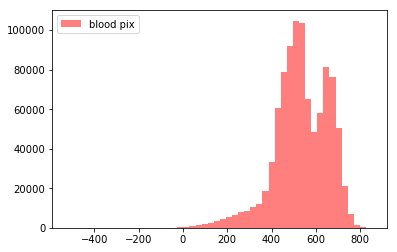

/home/marsdenlab/datasets/vascular_data/OSMSC0184/OSMSC0184-cm.mha
ct


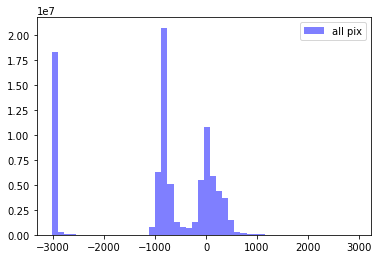

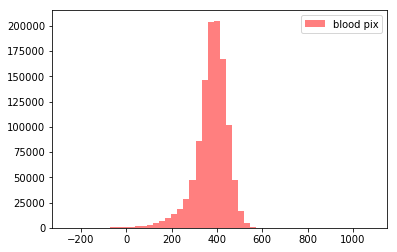

/home/marsdenlab/datasets/vascular_data/OSMSC0185/OSMSC0185-cm.mha
ct


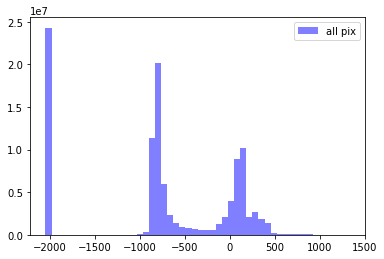

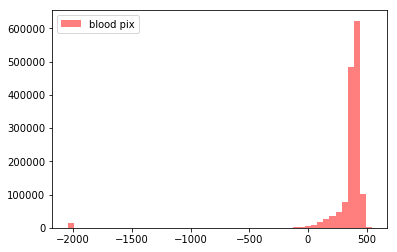

/home/marsdenlab/datasets/vascular_data/OSMSC0186/OSMSC0186-cm.mha
ct


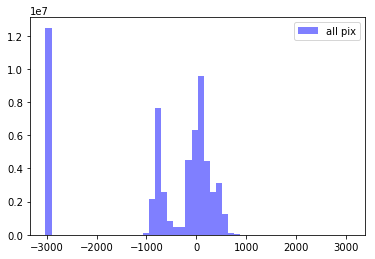

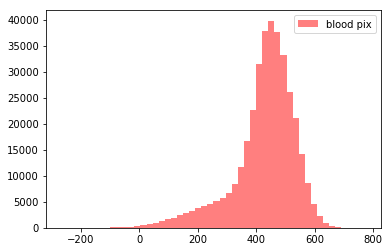

/home/marsdenlab/datasets/vascular_data/OSMSC0187/OSMSC0187-cm.mha
ct


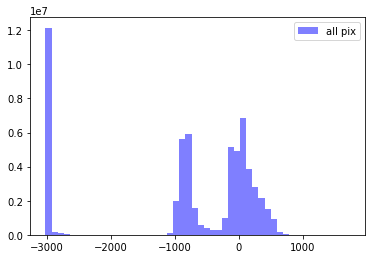

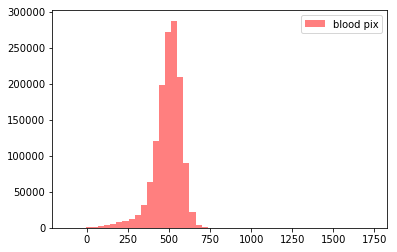

/home/marsdenlab/datasets/vascular_data/OSMSC0188/OSMSC0188-cm.mha
ct


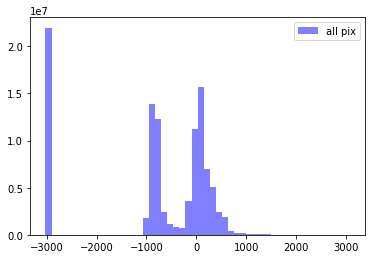

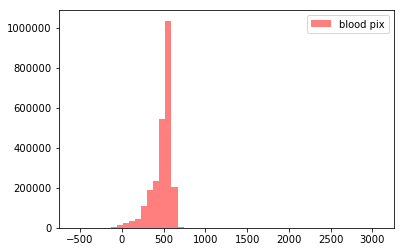

/home/marsdenlab/datasets/vascular_data/OSMSC0189/OSMSC0189-cm.mha
mr


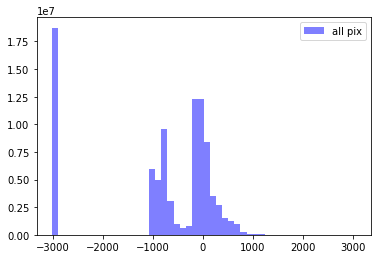

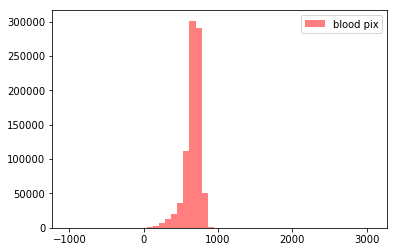

/home/marsdenlab/datasets/vascular_data/cabg10/cabg10-image.mha
ct


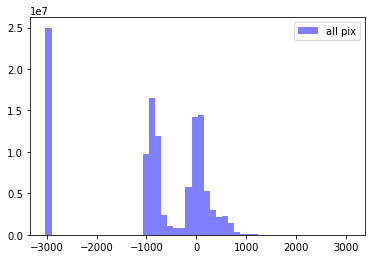

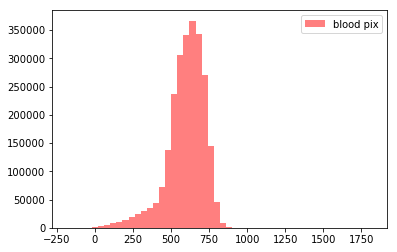

/home/marsdenlab/datasets/vascular_data/cabg11/cabg11-image.mha
ct


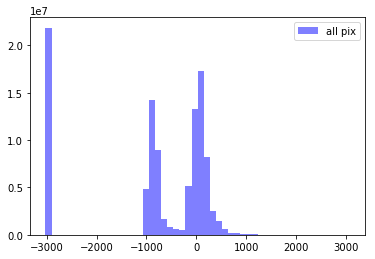

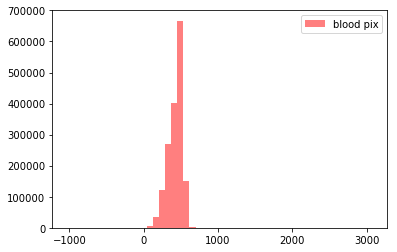

/home/marsdenlab/datasets/vascular_data/cabg5/cabg5-image.mha
ct


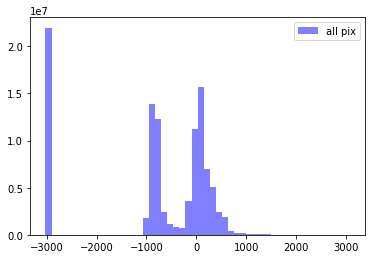

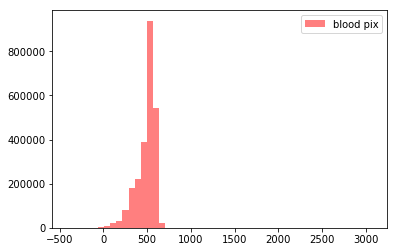

In [5]:
for i in range(len(ims)):
    print ims[i]
    if any([s in ims[i] for s in ct_ims]):
        print 'ct'
    else:
        print 'mr'

    p,b = get_pix(ims[i],truths[i])
    plt.figure()
    plt.hist(p,bins=50,alpha=0.5,color='b',label='all pix')
    plt.legend()
    plt.show()

    plt.figure()
    plt.hist(b,bins=50,alpha=0.5,color='r',label='blood pix')
    plt.legend()
    plt.show()

/home/marsdenlab/datasets/vascular_data/OSMSC0001/OSMSC0001-cm.mha
ct


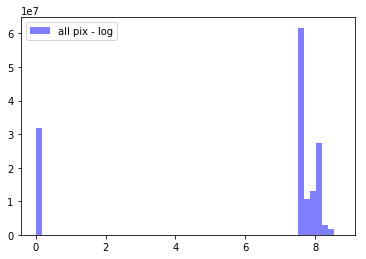

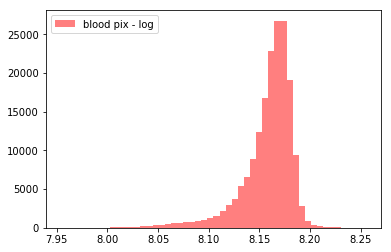

/home/marsdenlab/datasets/vascular_data/OSMSC0002/OSMSC0002-cm.mha
ct


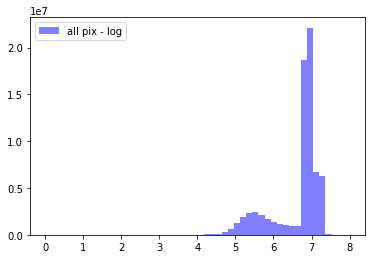

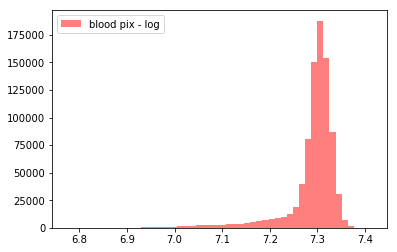

/home/marsdenlab/datasets/vascular_data/OSMSC0003/OSMSC0003-cm.mha
ct


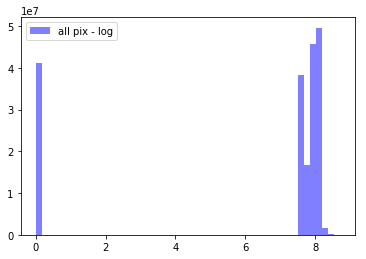

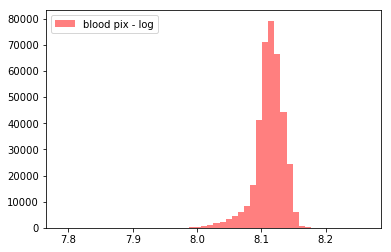

/home/marsdenlab/datasets/vascular_data/OSMSC0004/OSMSC0004-cm.mha
ct


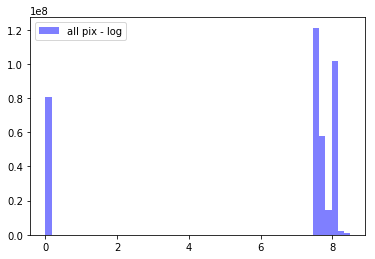

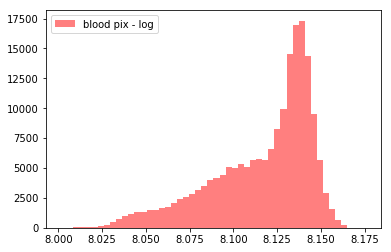

/home/marsdenlab/datasets/vascular_data/OSMSC0005/OSMSC0005-cm.mha
ct


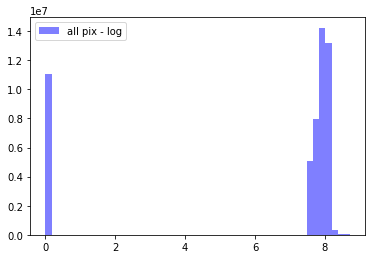

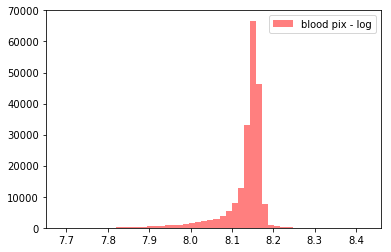

/home/marsdenlab/datasets/vascular_data/OSMSC0006/OSMSC0006-cm.mha
mr


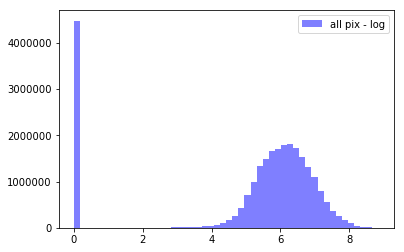

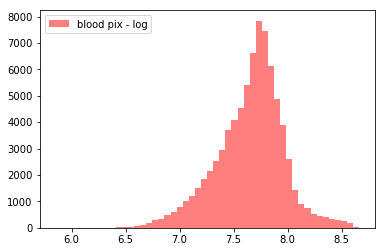

/home/marsdenlab/datasets/vascular_data/OSMSC0066/OSMSC0066-cm.mha
mr


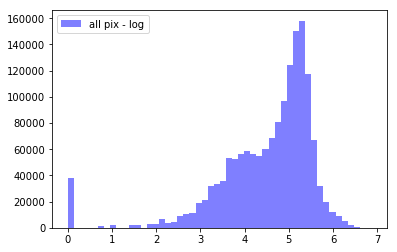

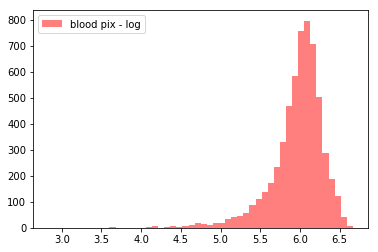

/home/marsdenlab/datasets/vascular_data/OSMSC0068/OSMSC0068-cm.mha
mr


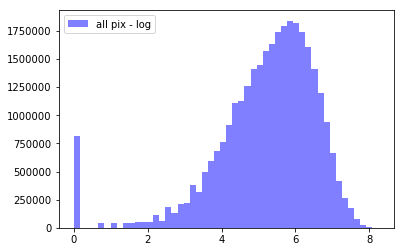

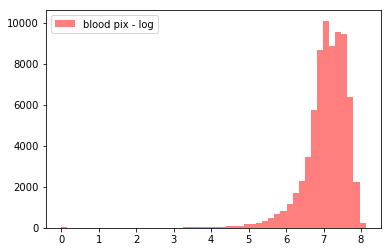

/home/marsdenlab/datasets/vascular_data/OSMSC0069/OSMSC0069-cm.mha
mr


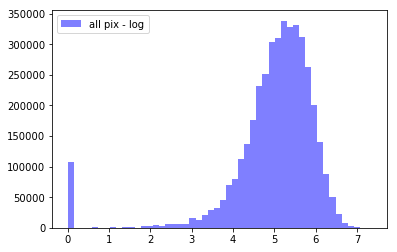

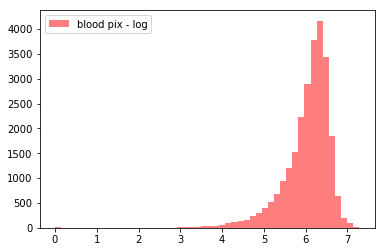

/home/marsdenlab/datasets/vascular_data/OSMSC0071/OSMSC0071-cm.mha
mr


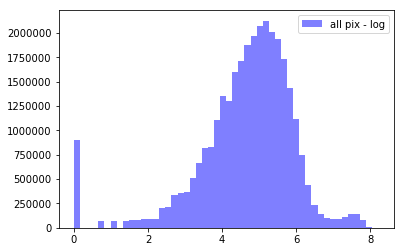

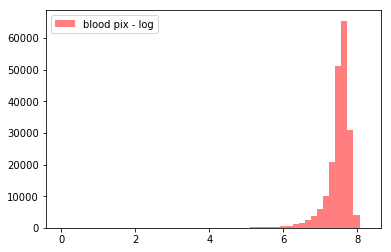

/home/marsdenlab/datasets/vascular_data/OSMSC0072/OSMSC0072-cm.mha
mr


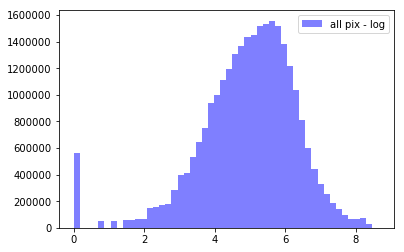

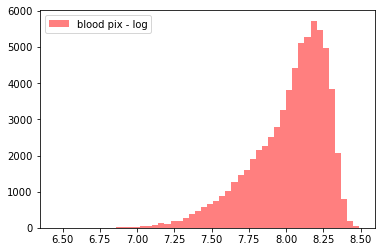

/home/marsdenlab/datasets/vascular_data/OSMSC0073/OSMSC0073-cm.mha
mr


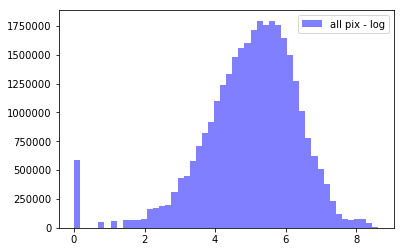

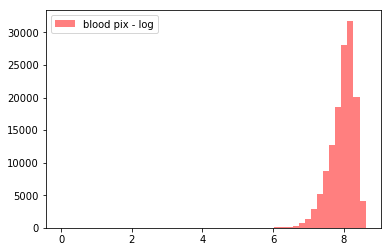

/home/marsdenlab/datasets/vascular_data/OSMSC0074/OSMSC0074-cm.mha
mr


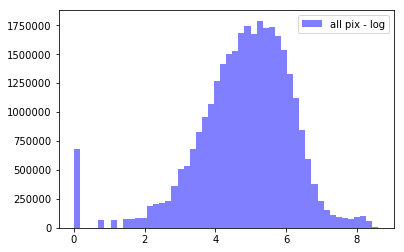

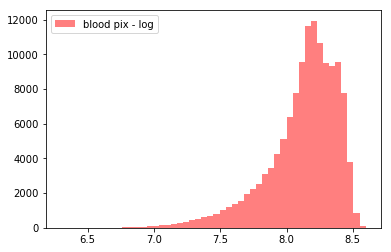

/home/marsdenlab/datasets/vascular_data/OSMSC0078/OSMSC0078-cm.mha
mr


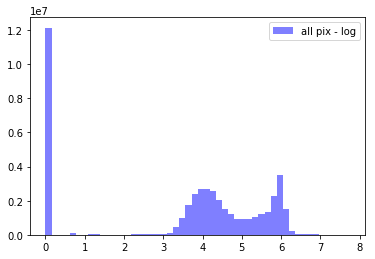

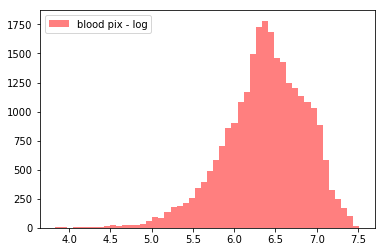

/home/marsdenlab/datasets/vascular_data/OSMSC0079/OSMSC0079-cm.mha
mr


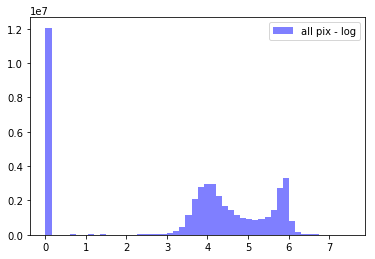

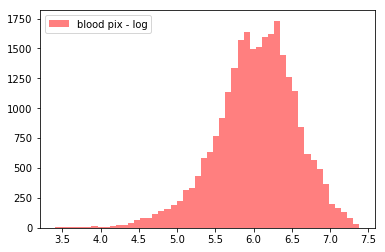

/home/marsdenlab/datasets/vascular_data/OSMSC0083/OSMSC0083-cm.mha
mr


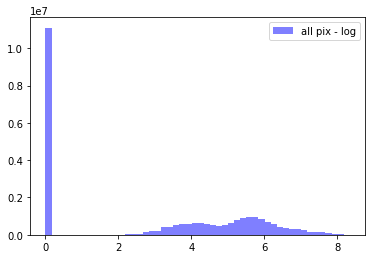

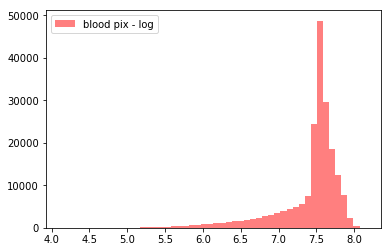

/home/marsdenlab/datasets/vascular_data/OSMSC0085/OSMSC0085-cm.mha
mr


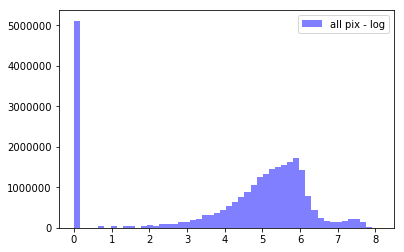

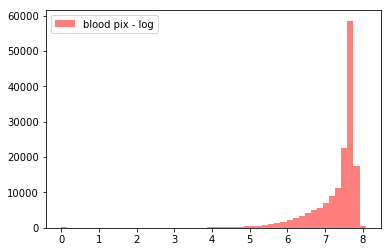

/home/marsdenlab/datasets/vascular_data/OSMSC0087/OSMSC0087-cm.mha
mr


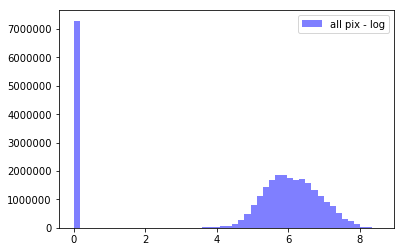

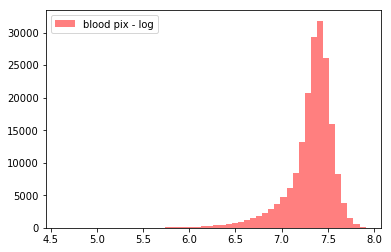

/home/marsdenlab/datasets/vascular_data/OSMSC0090/OSMSC0090-cm.mha
mr


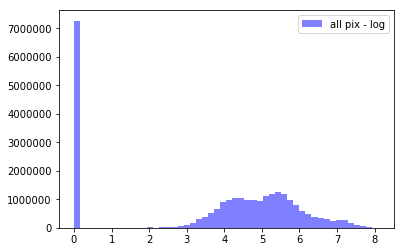

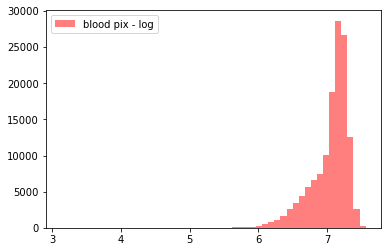

/home/marsdenlab/datasets/vascular_data/OSMSC0092/OSMSC0092-cm.mha
ct


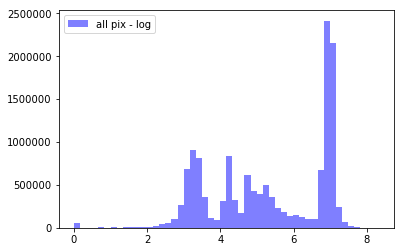

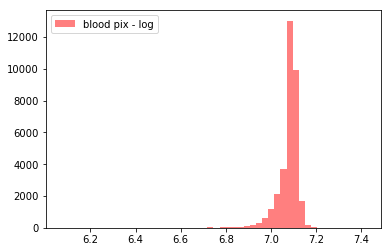

/home/marsdenlab/datasets/vascular_data/OSMSC0093/OSMSC0093-cm.mha
mr


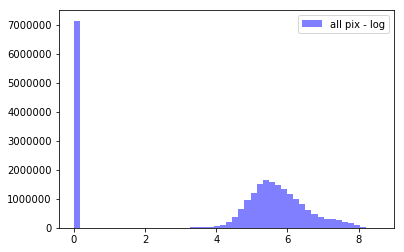

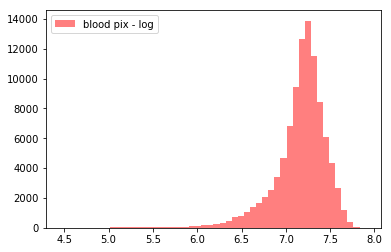

/home/marsdenlab/datasets/vascular_data/OSMSC0094/OSMSC0094-cm.mha
mr


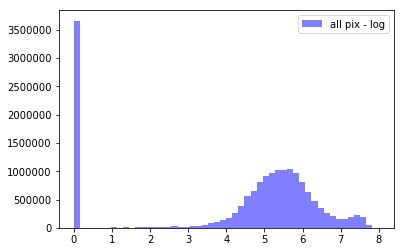

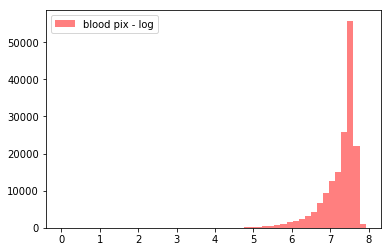

/home/marsdenlab/datasets/vascular_data/OSMSC0095/OSMSC0095-cm.mha
mr


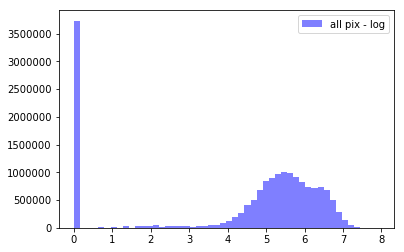

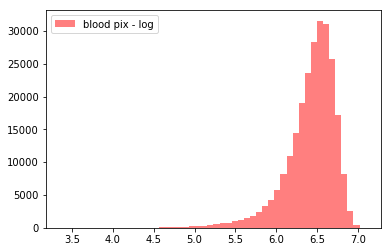

/home/marsdenlab/datasets/vascular_data/OSMSC0096/OSMSC0096-cm.mha
mr


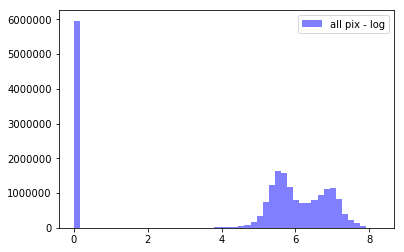

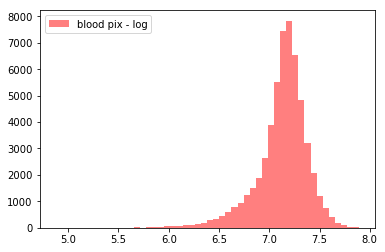

/home/marsdenlab/datasets/vascular_data/OSMSC0097/OSMSC0097-cm.mha
mr


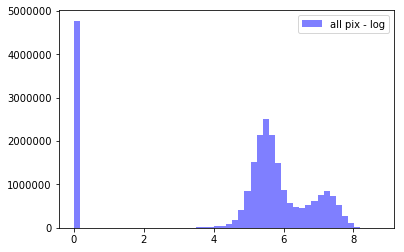

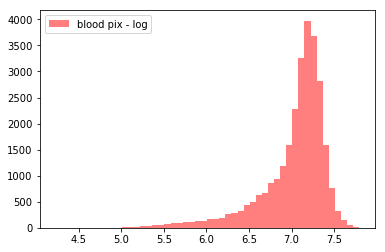

/home/marsdenlab/datasets/vascular_data/OSMSC0098/OSMSC0098-cm.mha
mr


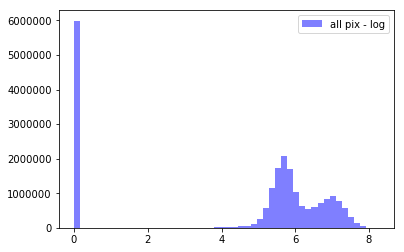

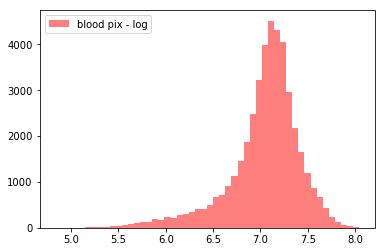

/home/marsdenlab/datasets/vascular_data/OSMSC0099/OSMSC0099-cm.mha
mr


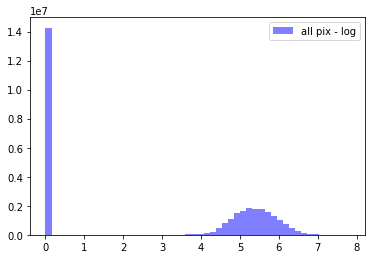

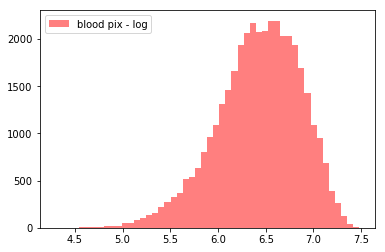

/home/marsdenlab/datasets/vascular_data/OSMSC0100/OSMSC0100-cm.mha
mr


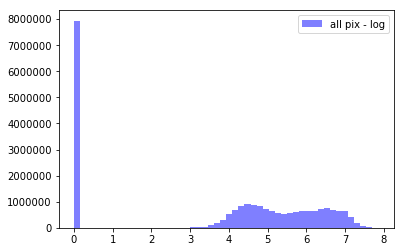

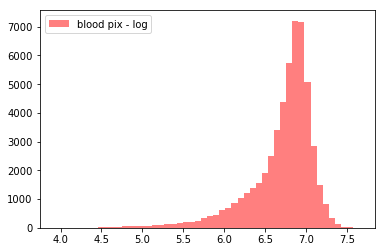

/home/marsdenlab/datasets/vascular_data/OSMSC0101/OSMSC0101-cm.mha
mr


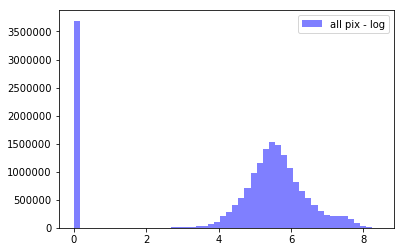

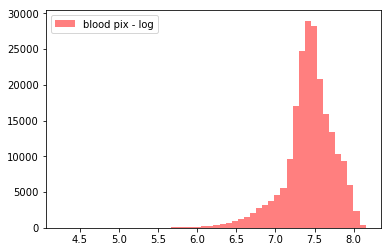

/home/marsdenlab/datasets/vascular_data/OSMSC0103/OSMSC0103-cm.mha
mr


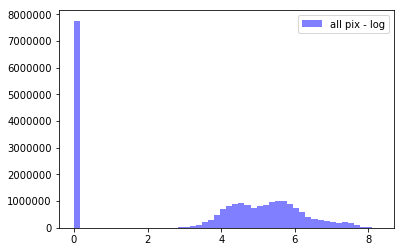

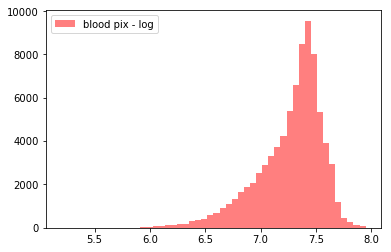

/home/marsdenlab/datasets/vascular_data/OSMSC0104/OSMSC0104-cm.mha
mr


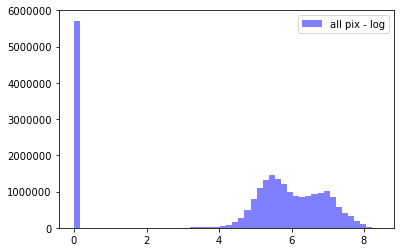

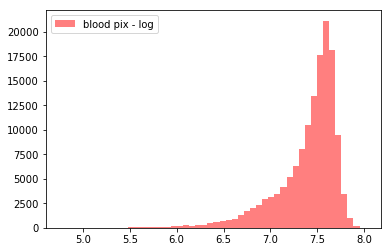

/home/marsdenlab/datasets/vascular_data/OSMSC0105/OSMSC0105-cm.mha
mr


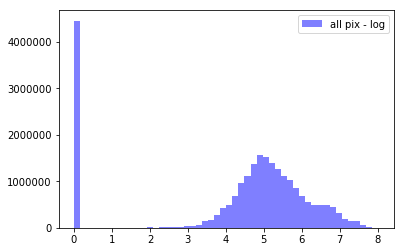

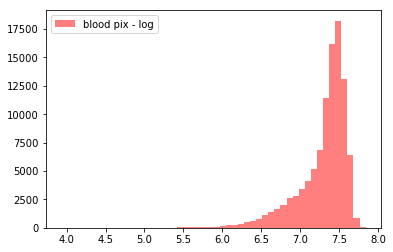

/home/marsdenlab/datasets/vascular_data/OSMSC0106/OSMSC0106-cm.mha
mr


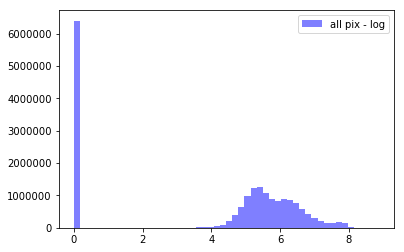

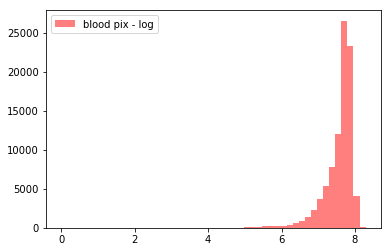

/home/marsdenlab/datasets/vascular_data/OSMSC0108/OSMSC0108-cm.mha
ct


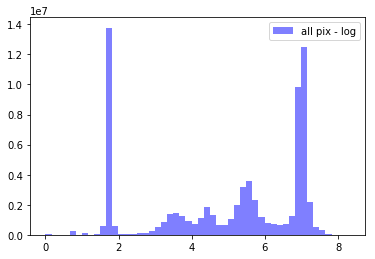

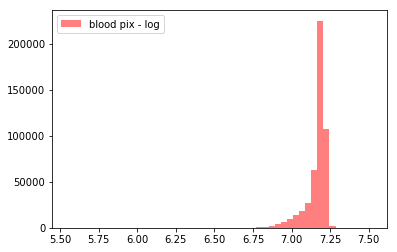

/home/marsdenlab/datasets/vascular_data/OSMSC0109/OSMSC0109-cm.mha
ct


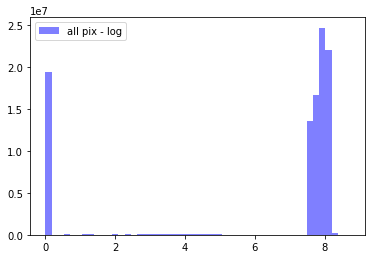

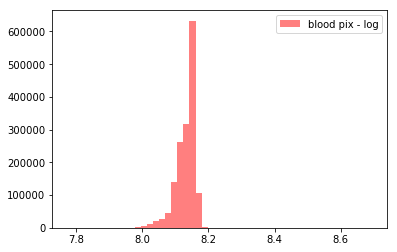

/home/marsdenlab/datasets/vascular_data/OSMSC0110/OSMSC0110-cm.mha
mr


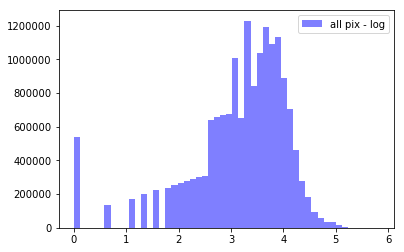

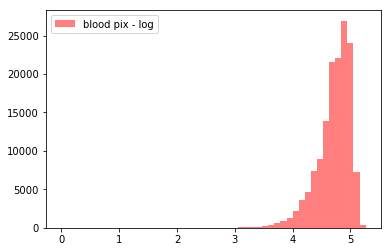

/home/marsdenlab/datasets/vascular_data/OSMSC0113/OSMSC0113-cm.mha
ct


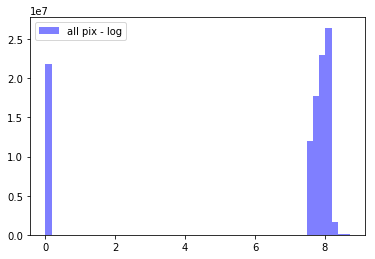

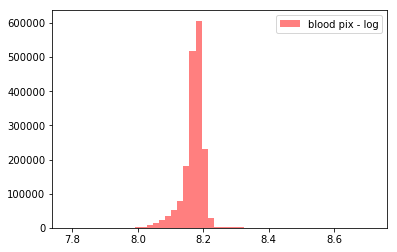

/home/marsdenlab/datasets/vascular_data/OSMSC0115/OSMSC0115-cm.mha
ct


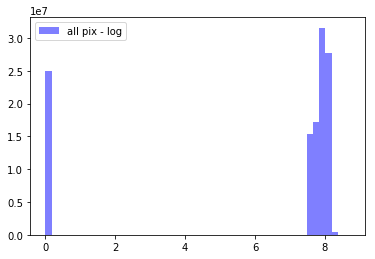

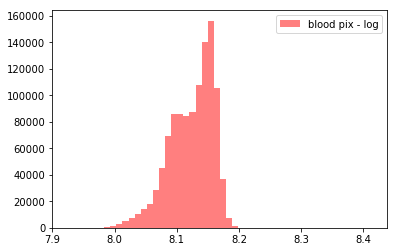

/home/marsdenlab/datasets/vascular_data/OSMSC0116/OSMSC0116-cm.mha
ct


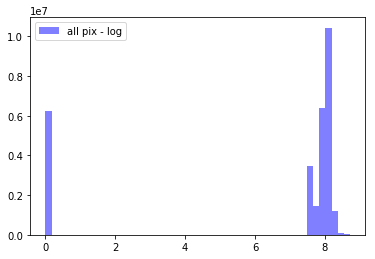

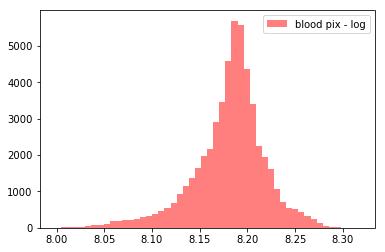

/home/marsdenlab/datasets/vascular_data/OSMSC0117/OSMSC0117-cm.mha
ct


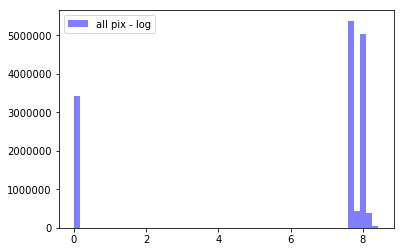

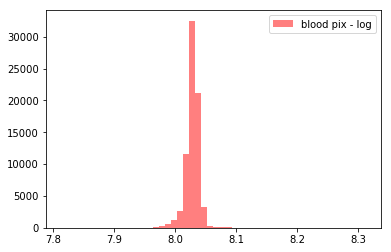

/home/marsdenlab/datasets/vascular_data/OSMSC0118/OSMSC0118-cm.mha
ct


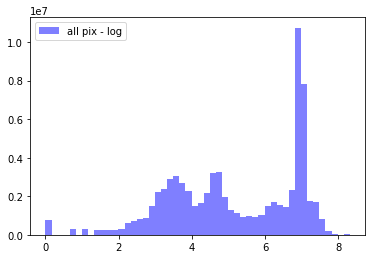

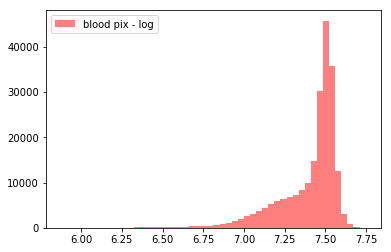

/home/marsdenlab/datasets/vascular_data/OSMSC0119/OSMSC0119-cm.mha
ct


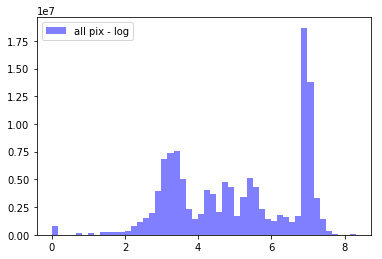

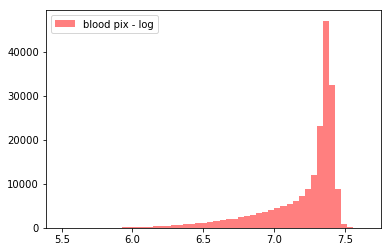

/home/marsdenlab/datasets/vascular_data/OSMSC0121/OSMSC0121-cm.mha
mr


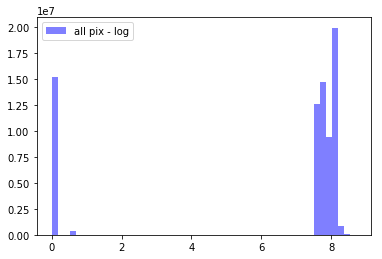

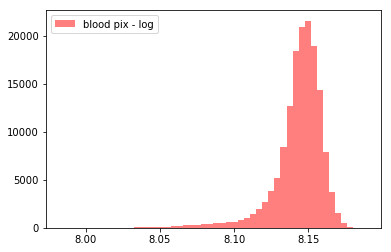

/home/marsdenlab/datasets/vascular_data/OSMSC0125/OSMSC0125-cm.mha
mr


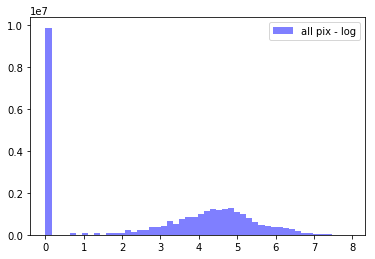

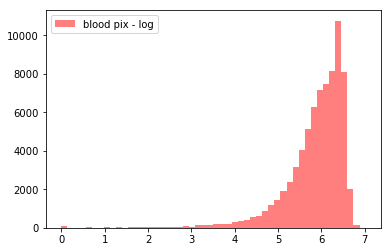

/home/marsdenlab/datasets/vascular_data/OSMSC0126/OSMSC0126-cm.mha
mr


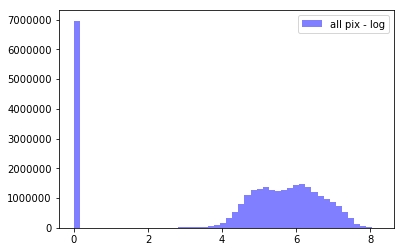

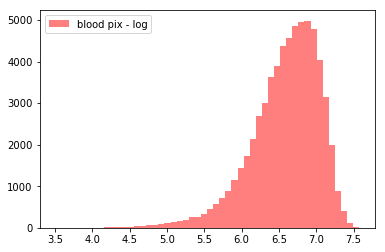

/home/marsdenlab/datasets/vascular_data/OSMSC0129/OSMSC0129-cm.mha
mr


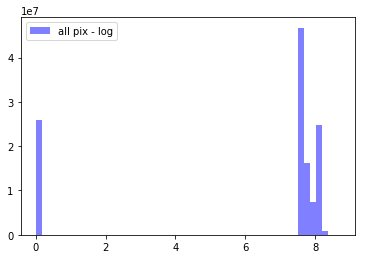

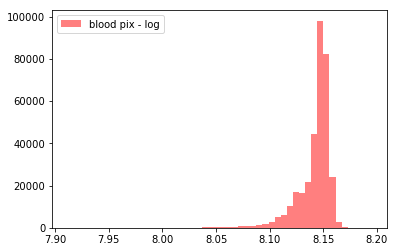

/home/marsdenlab/datasets/vascular_data/OSMSC0130/OSMSC0130-cm.mha
mr


/home/marsdenlab/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log


ValueError: max must be larger than min in range parameter.

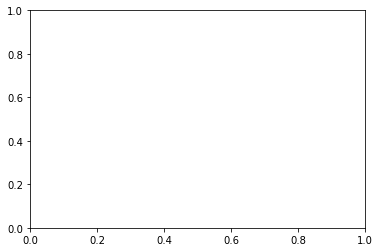

In [9]:
for i in range(len(ims)):
    print ims[i]
    if any([s in ims[i] for s in ct_ims]):
        print 'ct'
    else:
        print 'mr'

    p,b = get_pix(ims[i],truths[i])
    plt.figure()
    plt.hist(np.log(p-np.amin(p)+1),bins=50,alpha=0.5,color='b',label='all pix - log')
    plt.legend()
    plt.show()

    plt.figure()
    plt.hist(np.log(b-np.amin(p)+1),bins=50,alpha=0.5,color='r',label='blood pix - log')
    plt.legend()
    plt.show()